<h2><center>Advanced  Regression - Ridge & Lasso </center></h2>

A US-based housing company named Surprise Housing has decided to enter the Australian market.The company is looking at prospective properties to buy. 

The company wants to know:
    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.


Data Understanding:

   - The company has collected a data set from the sale of houses in Australia.
   - We need to model the price of houses with the available independent variables.

In [1]:
#import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chardet
from scipy import stats
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm  
#import variance_inflation_factor to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Change display to show more rows for visual analysis
pd.set_option('display.max_rows', 500)

# Change display format to not show scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns
pd.set_option('display.max_columns', 500)

In [162]:
#Identify the encoding type of the 'csv' file using chardet
with open('train.csv','rb') as f:
    data = f.read()
encoding = chardet.detect(data).get("encoding")
print(encoding)

ascii


In [4]:
house = pd.read_csv('train.csv',encoding="ascii",low_memory=False)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
house.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00   

In [8]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
house.shape

(1460, 81)

Observation:
   - Dataset `house` contains `81` features/columns and `1460` datapoints
   - `'SalePrice'` is our `target|dependent` variable
   - we have categorical and numeric variables in our dataset
  

#### Data Cleaning

#### `Missing Values`

In [10]:
#Function to find missing value percent in the DataSet
def missingValues(df):
   missingcontent=round(df.isnull().sum()/len(df) *100,2)
   print("Total Missing Value Percentage in dataframe: ",round(missingcontent.mean(),2))
   print(missingcontent[missingcontent>0].sort_values(ascending=False))

In [11]:
missingValues(house)

Total Missing Value Percentage in dataframe:  5.89
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


Observation:
   - `'PoolQC'` has `99.52%` missing values
   - `'MiscFeature'` has `96.30%` missing values
   - `'Alley'` has `93.77%` missing values
   - `'Fence'` has `80.75%` missing values
   
 `Dropping these columns from our Dataset`
 
 AND Also drop 'Id' has it doesn't have any significance in the analysis

In [12]:
house.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence'],inplace=True)

In [13]:
missingValues(house)

Total Missing Value Percentage in dataframe:  1.4
FireplaceQu    47.26
LotFrontage    17.74
GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageYrBlt     5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


`'LotFrontage'`

In [14]:
house['LotFrontage'].fillna(value=house['LotFrontage'].mode()[0],inplace=True)

`'GarageFinish'` , `'GarageYrBlt'` , `'GarageType'` , `'MasVnrArea'` , `'MasVnrType'`

In [15]:
house['GarageFinish'] = house['GarageFinish'].fillna('None')
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['GarageType'] = house['GarageType'].fillna('None')
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['MasVnrType'] = house['MasVnrType'].fillna('None')

In [16]:
missingValues(house)

Total Missing Value Percentage in dataframe:  0.94
FireplaceQu    47.26
GarageCond      5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
Electrical      0.07
dtype: float64


In [17]:
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
house['Electrical'] = house['Electrical'].fillna(house['Electrical'].mode()[0])

In [19]:
missingValues(house)

Total Missing Value Percentage in dataframe:  0.94
FireplaceQu    47.26
GarageCond      5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
dtype: float64


In [20]:
house['FireplaceQu'] = house['FireplaceQu'].fillna('NA')
house['GarageCond'] = house['GarageCond'].fillna('NA')
house['GarageQual'] = house['GarageQual'].fillna('NA')
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('NA')
house['BsmtExposure'] = house['BsmtExposure'].fillna('NA')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('NA')
house['BsmtCond'] = house['BsmtCond'].fillna('NA')
house['BsmtQual'] = house['BsmtQual'].fillna('NA')

In [21]:
missingValues(house)

Total Missing Value Percentage in dataframe:  0.0
Series([], dtype: float64)


Observation:
    
   - We have `0% missing values in our dataset`

In [22]:
#MSSubClass is in int type . Let's convert it to str
house['MSSubClass'] = house['MSSubClass'].astype(str)

Standardise the case for the categorical values in the columns

In [23]:
#Function to convert the values to the lower case
def StandardiseCase(df,cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: str(x).lower())

In [24]:
#Categorical Columns
categorical_Columns = list(set(house.columns)-set(house._get_numeric_data().columns))
print(categorical_Columns)

['Condition2', 'MSSubClass', 'GarageQual', 'Utilities', 'LotConfig', 'Exterior1st', 'Functional', 'ExterCond', 'BsmtExposure', 'BsmtFinType1', 'CentralAir', 'Exterior2nd', 'SaleType', 'Street', 'LandContour', 'FireplaceQu', 'LotShape', 'HeatingQC', 'Foundation', 'BsmtFinType2', 'LandSlope', 'Heating', 'MasVnrType', 'HouseStyle', 'BsmtQual', 'Neighborhood', 'GarageFinish', 'GarageType', 'MSZoning', 'SaleCondition', 'Condition1', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'ExterQual', 'BldgType', 'KitchenQual', 'BsmtCond', 'GarageCond', 'Electrical']


In [25]:
#Standardise the Categorical Values
StandardiseCase(house,categorical_Columns)

In [26]:
house[categorical_Columns].head()

Condition2 MSSubClass GarageQual Utilities LotConfig Exterior1st Functional  \
0       norm         60         ta    allpub    inside     vinylsd        typ   
1       norm         20         ta    allpub       fr2     metalsd        typ   
2       norm         60         ta    allpub    inside     vinylsd        typ   
3       norm         70         ta    allpub    corner     wd sdng        typ   
4       norm         60         ta    allpub       fr2     vinylsd        typ   

  ExterCond BsmtExposure BsmtFinType1 CentralAir Exterior2nd SaleType Street  \
0        ta           no          glq          y     vinylsd       wd   pave   
1        ta           gd          alq          y     metalsd       wd   pave   
2        ta           mn          glq          y     vinylsd       wd   pave   
3        ta           no          alq          y     wd shng       wd   pave   
4        ta           av          glq          y     vinylsd       wd   pave   

  LandContour FireplaceQu LotShape HeatingQC Foundation BsmtFinType2  \
0         lvl          na      reg        ex      pconc          unf   
1         lvl          ta      reg        ex     cblock          unf   
2         lvl          ta      ir1        ex      pconc          unf   
3         lvl          gd      ir1        gd     brktil          unf   
4         lvl          ta      ir1        ex      pconc          unf   

  LandSlope Heating MasVnrType HouseStyle BsmtQual Neighborhood GarageFinish  \
0       gtl    gasa    brkface     2story       gd      collgcr          rfn   
1       gtl    gasa       none     1story       gd      veenker          rfn   
2       gtl    gasa    brkface     2story       gd      collgcr          rfn   
3       gtl    gasa       none     2story       ta      crawfor          unf   
4       gtl    gasa    brkface     2story       gd      noridge          rfn   

  GarageType MSZoning SaleCondition Condition1 PavedDrive RoofMatl RoofStyle  \
0     attchd       rl        normal       norm          y  compshg     gable   
1     attchd       rl        normal      feedr          y  compshg     gable   
2     attchd       rl        normal       norm          y  compshg     gable   
3     detchd       rl       abnorml       norm          y  compshg     gable   
4     attchd       rl        normal       norm          y  compshg     gable   

  ExterQual BldgType KitchenQual BsmtCond GarageCond Electrical  
0        gd     1fam          gd       ta         ta      sbrkr  
1        ta     1fam          ta       ta         ta      sbrkr  
2        gd     1fam          gd       ta         ta      sbrkr  
3        ta     1fam          gd       gd         ta      sbrkr  
4        gd     1fam          gd       ta         ta      sbrkr

If we notice, We have some quality , condition scales in our dataset for the below Variables:

`['FireplaceQu','GarageCond','GarageQual','BsmtCond','BsmtQual','KitchenQual','HeatingQC','ExterCond','ExterQual']`

Below is Quality grading given in the dataset. Let's map the Quality to corresponding values
		
     -  5: Ex	Excellent 
     -  4: Gd	Good     
     -  3: TA	Average/Typical  
     -  2: Fa	Fair            
     -  1: Po    Poor    
     -  0: NA	No Pool        

In [27]:
#Function to map the scale
def QualityMap(df,columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: 5 if x=='ex' else
                                      (4 if x=='gd' else
                                      (3 if x=='ta' else 
                                      (2 if x=='fa' else 
                                      (1 if x=='po' else 0)))))

In [28]:
colstoMapQuality = ['FireplaceQu','GarageCond','GarageQual','BsmtCond','BsmtQual','KitchenQual','HeatingQC','ExterCond','ExterQual']

#Map the Quality, Cond to the number scale
QualityMap(house,colstoMapQuality)

Let's Map `BsmtFinType1` and `BsmtFinType2`
       - 5: GLQ	Good Living Quarters 
       - 4: ALQ	Average Living Quarters
       - 3: BLQ	Below Average Living Quarters
       - 2: Rec	Average Rec Room
       - 1: LwQ	Low Quality
       - 0: Unf	Unfinshed
       - 0: NA	No Basement                       

In [29]:
mapper = {'glq':5,'alq':4,'blq':3,'rec':2,
         'lwq':1,'unf':0,'na':0}
house['BsmtFinType1'] = house['BsmtFinType1'].map(mapper)
house['BsmtFinType2'] = house['BsmtFinType2'].map(mapper)

`BsmtExposure` : Refers to walkout or garden level walls

      - Gd	Good Exposure : 3
      - Av	Average Exposure (split levels or foyers typically score average or above):2
      - Mn	Mimimum Exposure : 1
      - No	No Exposure : 0
      - NA	No Basement : 0

In [30]:
mapper = {'gd':3,'av':2,'mn':1,'no':0,'na':0}
house['BsmtExposure'] = house['BsmtExposure'].map(mapper).fillna(0)

Observation:
    
   - We have `0% missing values in our dataset`.
   - we standardised the cases
   - We have scaled the Quality , condition variables to numeric scale
   - We have replaced the few varible null values with the mode.

#### `Outliers`

In [31]:
numeric_columns = house.dtypes[house.dtypes != 'object'].index

In [32]:
print(numeric_columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


<Figure size 2160x1080 with 0 Axes>

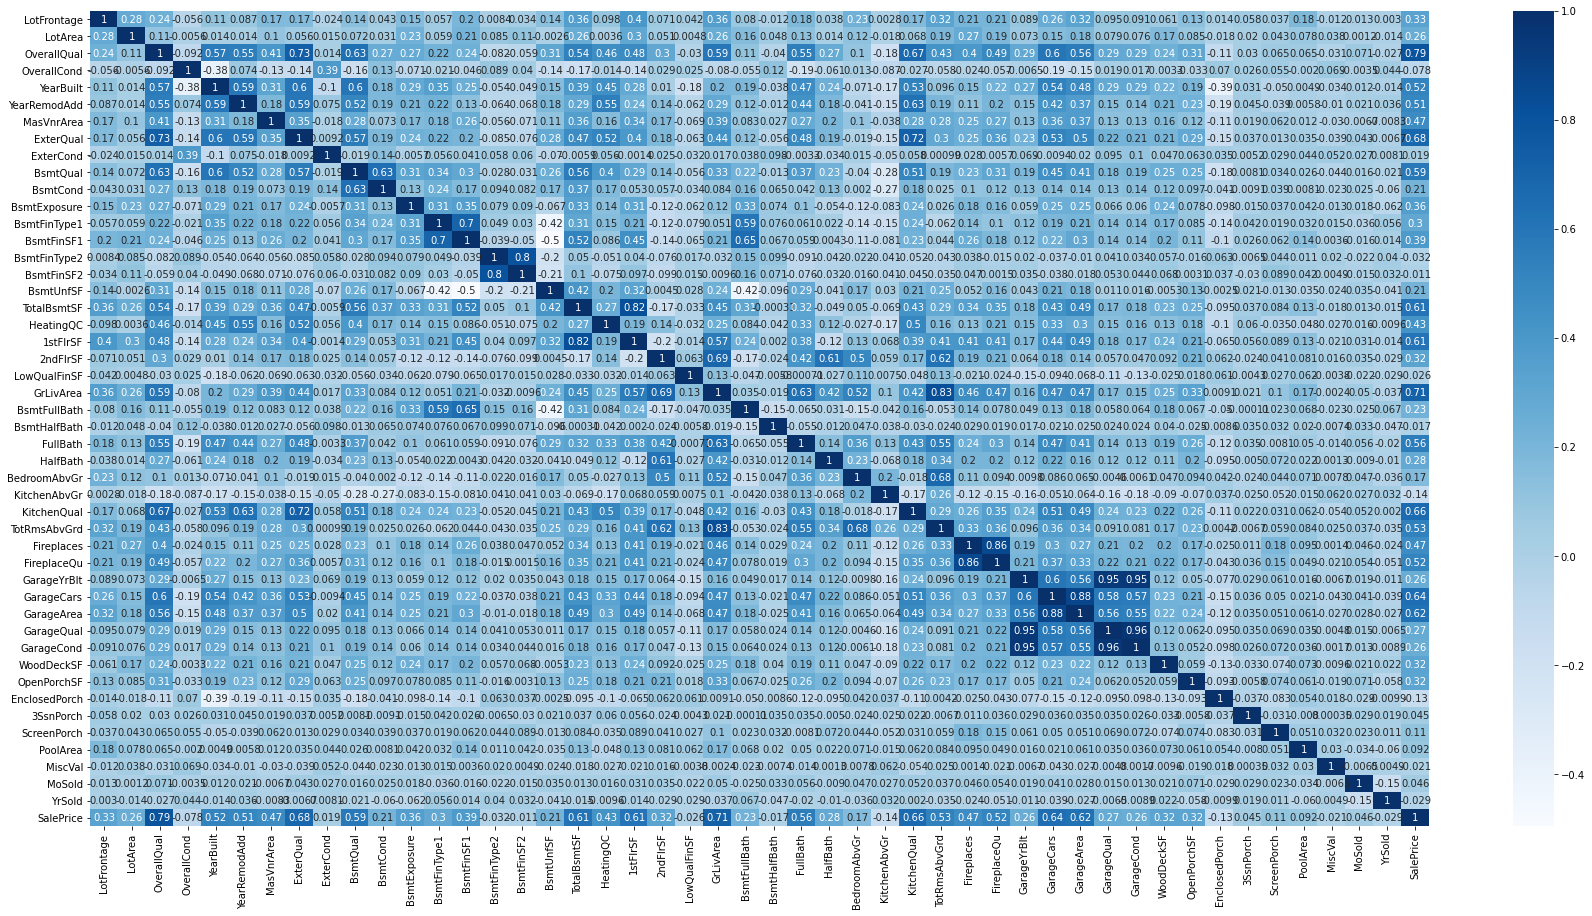

In [33]:
#plot heatmap to see the correlations b/w variables
plt.figure(figsize=(30,15))
sns.heatmap(house[numeric_columns].corr(),annot=True,cmap="Blues")
plt.show()

In [34]:
correlation = house[numeric_columns].corr()
print("Top 5 +v'ely correlated features : \n",correlation['SalePrice'].sort_values(ascending=False)[:5])
print("Top 5 -v'ely correlated features : \n",correlation['SalePrice'].sort_values(ascending=False)[-5:])

Top 5 +v'ely correlated features : 
 SalePrice     1.00
OverallQual   0.79
GrLivArea     0.71
ExterQual     0.68
KitchenQual   0.66
Name: SalePrice, dtype: float64
Top 5 -v'ely correlated features : 
 YrSold          -0.03
BsmtFinType2    -0.03
OverallCond     -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


Observation:
    
   - Many variables are highly correlated with other variables.
   - one/ more variables are represented by other single variable.
   - From heatmap : `'SalePrice'` is highly correlated with `'OverallQual'`, `'GrLivArea'`, `'GrageCars'`, `'GrageArea'`,`'TotalBsmtSF'`.,,,
   
 In Detail:
 
   - OverallQual   0.79
   - GrLivArea     0.71
   - GarageCars    0.64
   - ExterQual     0.68
   - KitchenQual   0.66
   - OverallCond     -0.08
   - ExterCond       -0.08
   - EnclosedPorch   -0.13
   - KitchenAbvGr    -0.14

In [35]:
#Considering the rating scale in the Quality and Condirion defining varibales - I have excluded them from the outlier treatment
#Defining the Columns to Analyse
Analyse_Cols = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

Let's Remove the Outliers from the variables:

In [36]:
#Copying the `house` to `house1` in case of any reference
house1 = house

#Removing the outliers from the target variable `'SalePrice'`

<Figure size 1440x360 with 0 Axes>

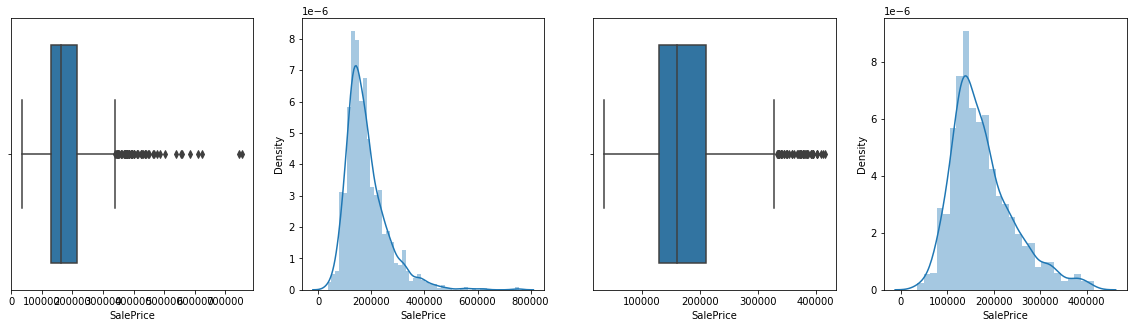

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.boxplot(data=house,x='SalePrice')
plt.subplot(1, 4, 2)
sns.distplot(house['SalePrice'])

#Remove Outliers from  variable 'SalePrice'
house = house[np.abs(stats.zscore(house['SalePrice']))<=3]

plt.subplot(1, 4, 3)
sns.boxplot(data=house,x='SalePrice')
plt.subplot(1, 4, 4)
sns.distplot(house['SalePrice'])
plt.show()

Let's treat the outliers in other numeric variables

In [38]:
#Function to treat the outliers 
def treat_Outliers(df,Cols):
    for col in Cols:
        plt.figure(figsize=(25,5))
        plt.subplot(1, 4, 1)
        sns.boxplot(data=df,x=col)
        plt.subplot(1, 4, 2)
        sns.scatterplot(data=df,x=col,y='SalePrice')
        df = df[np.abs(stats.zscore(df[col]))<=3]
        plt.subplot(1, 4, 3)
        sns.scatterplot(data=df,x=col,y='SalePrice')
        plt.subplot(1, 4, 4)
        sns.boxplot(data=df,x=col)
    return df

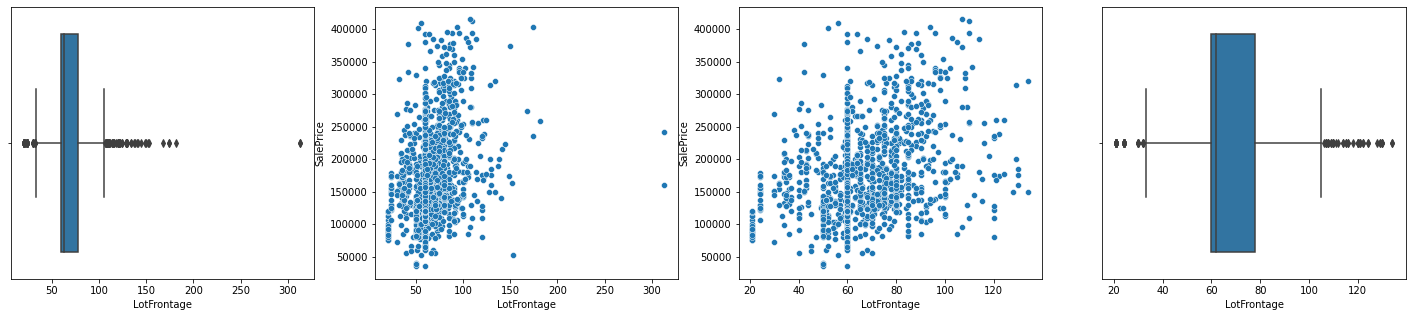

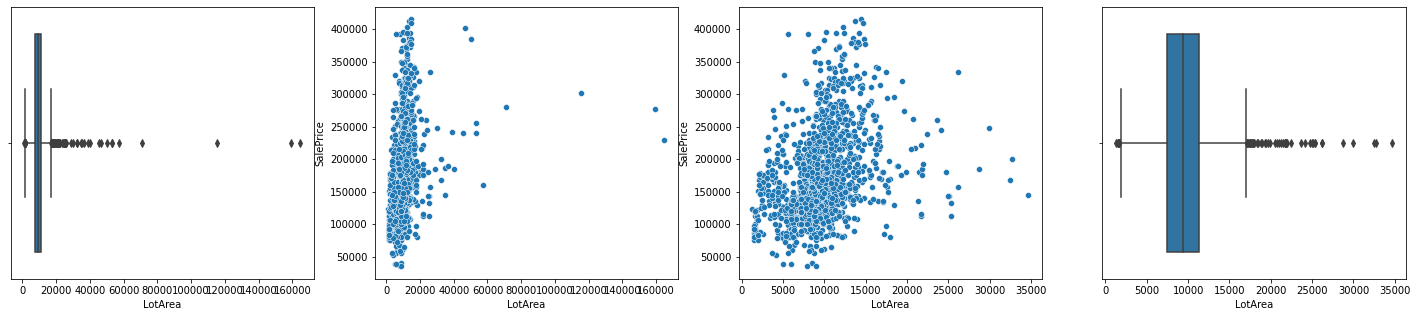

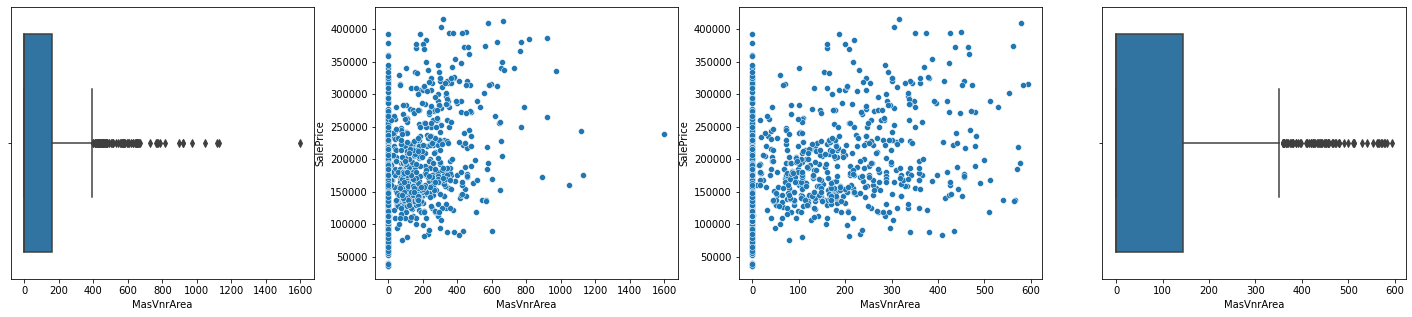

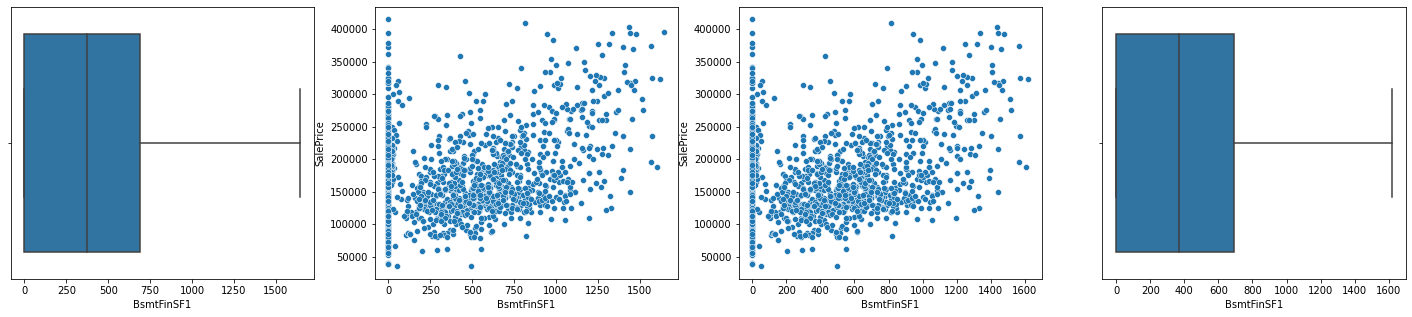

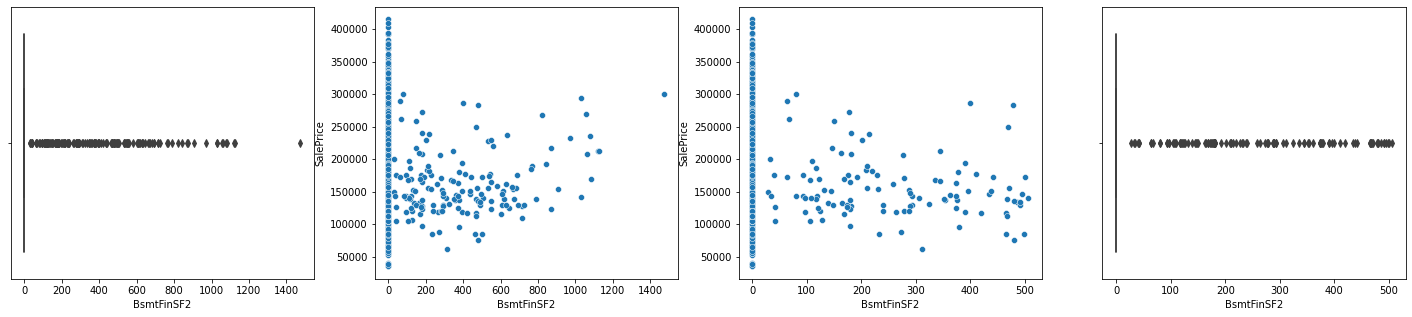

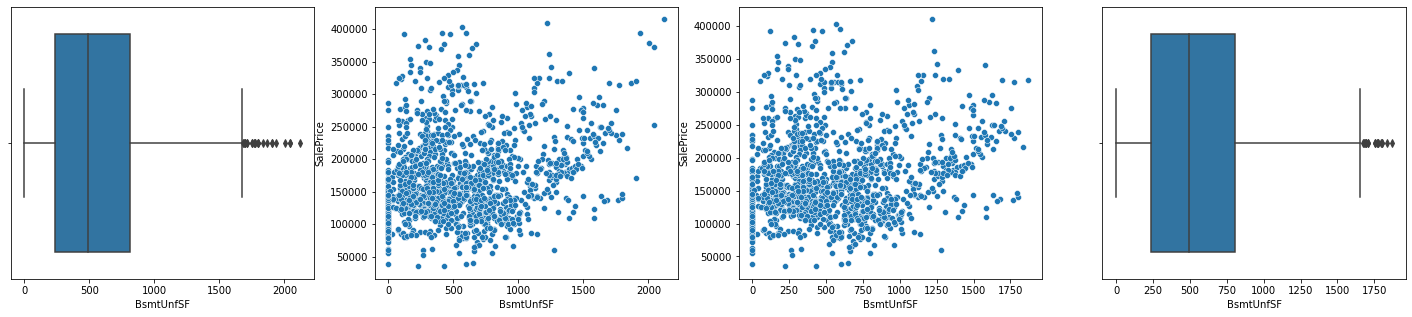

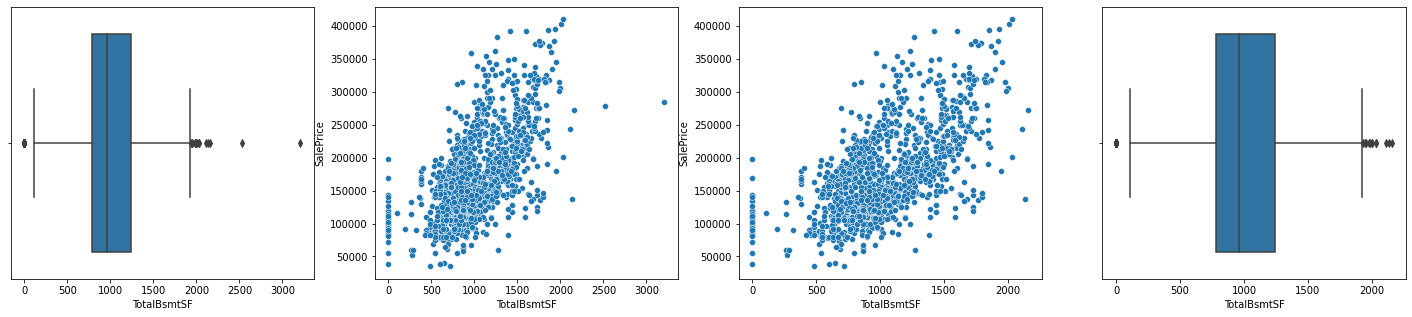

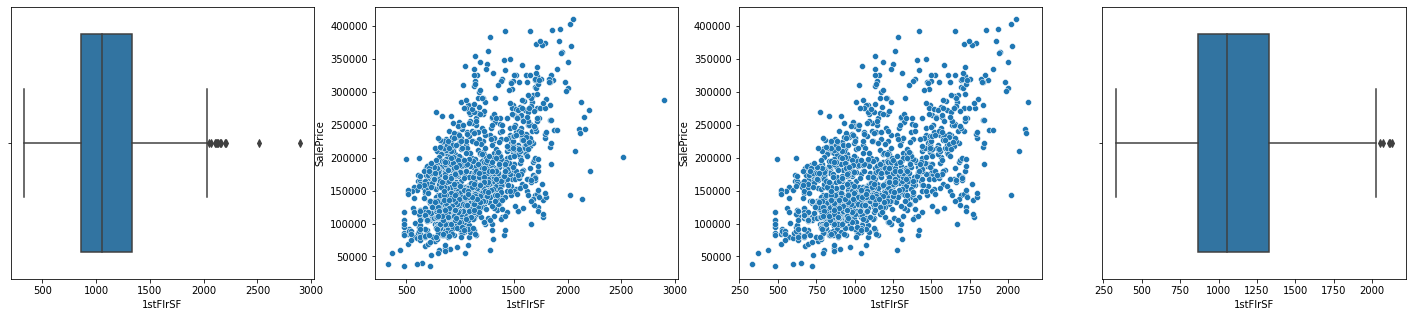

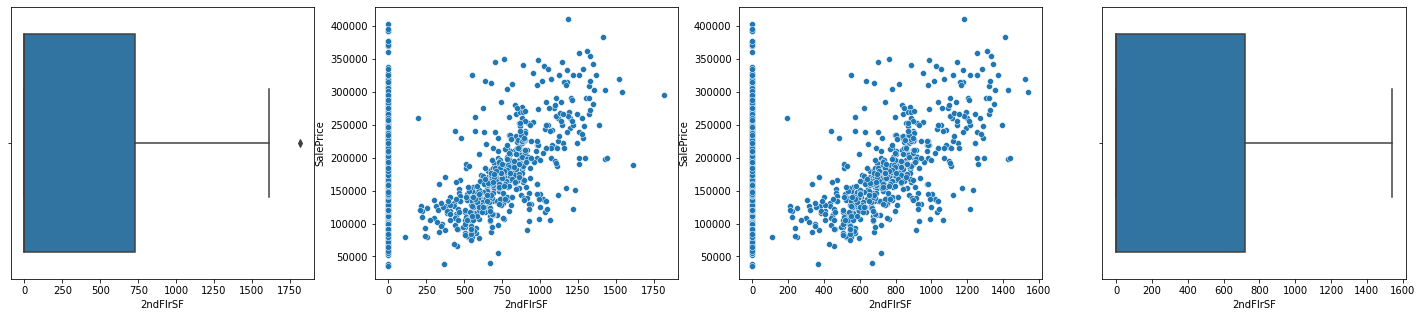

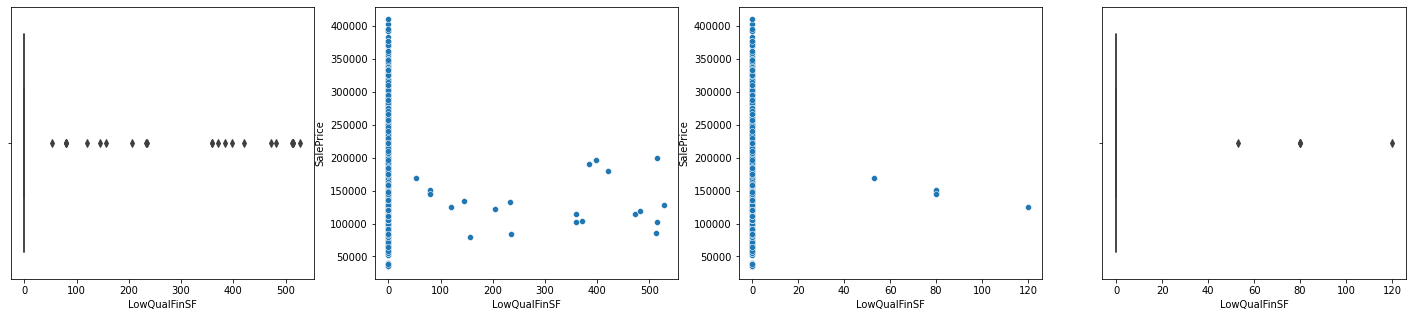

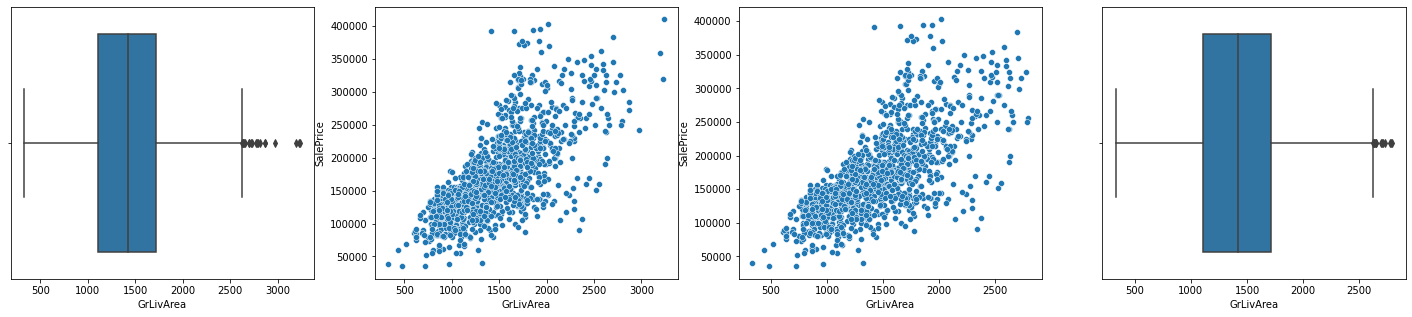

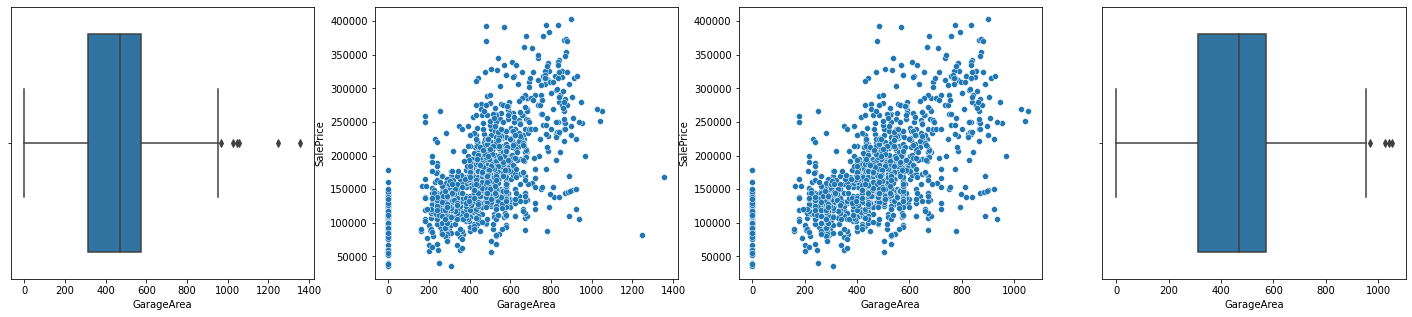

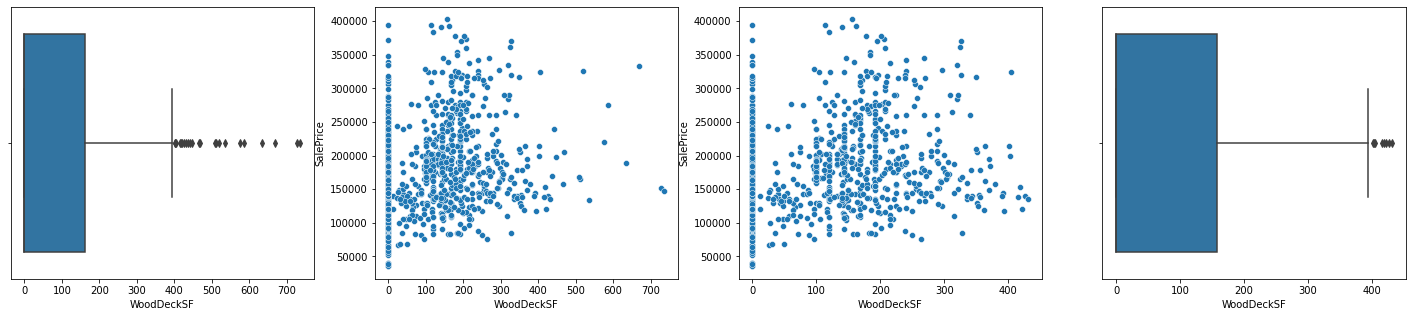

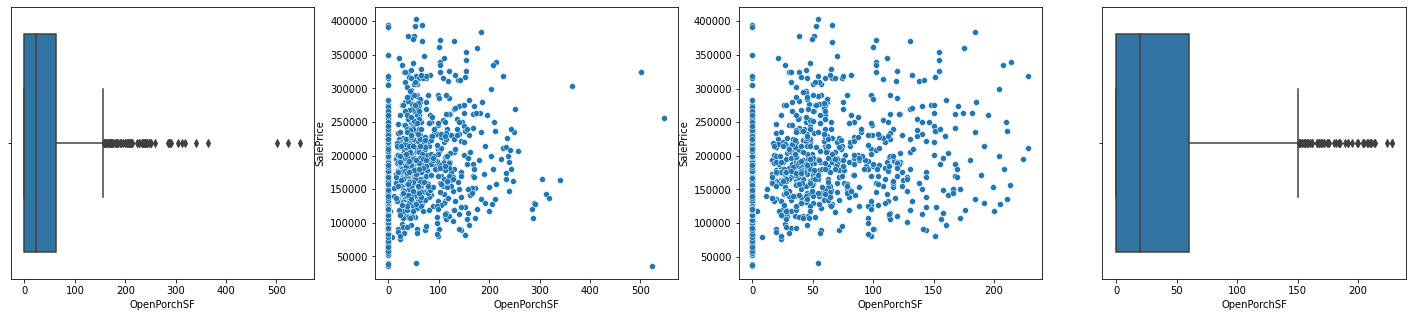

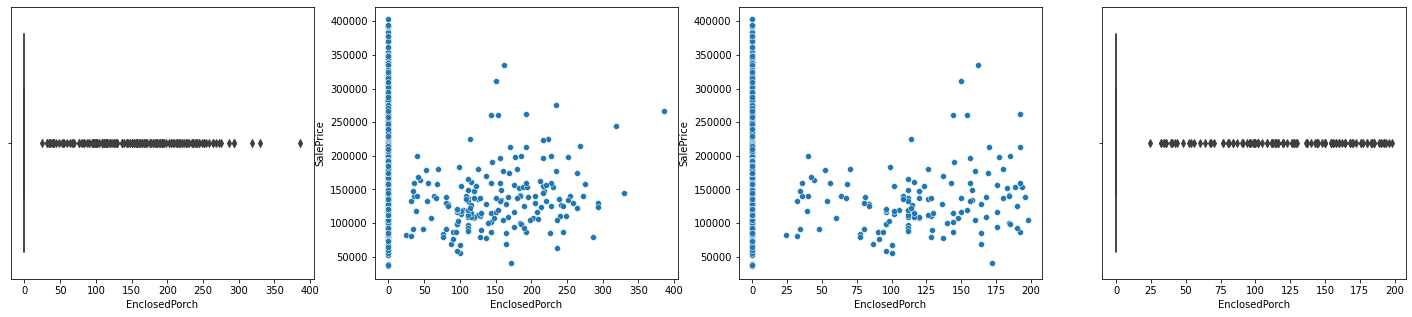

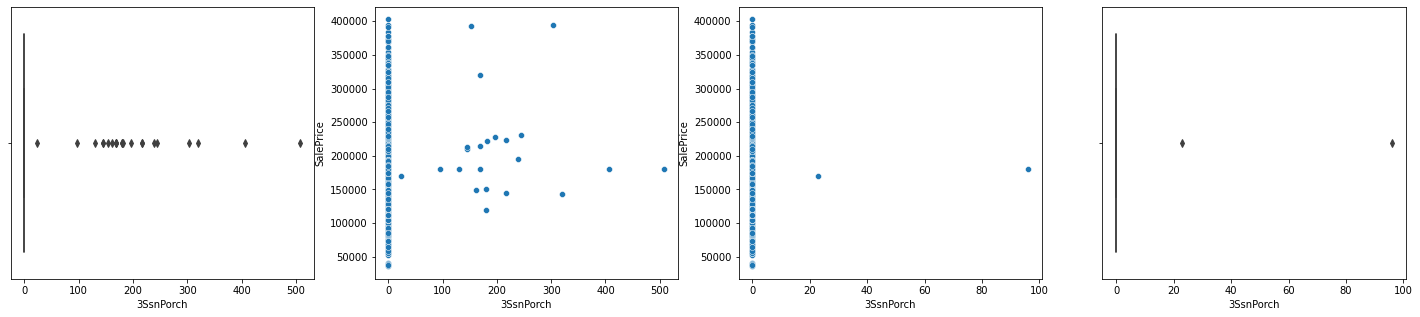

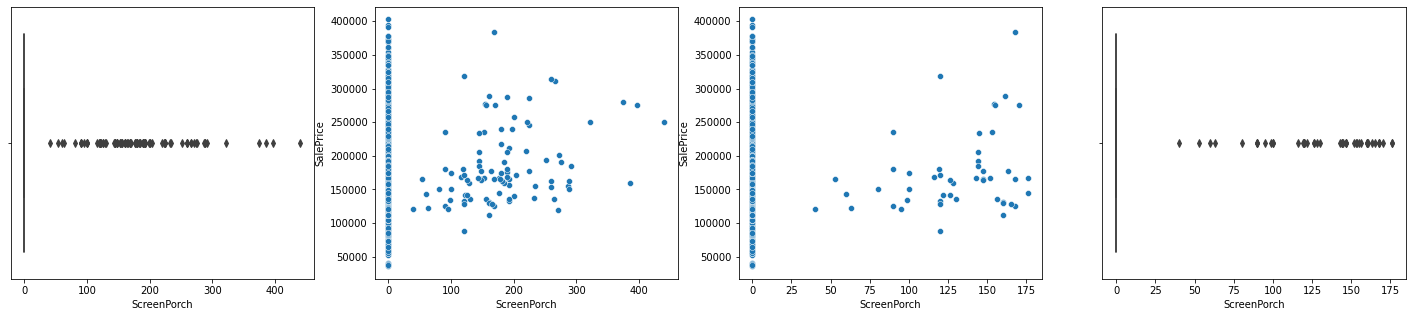

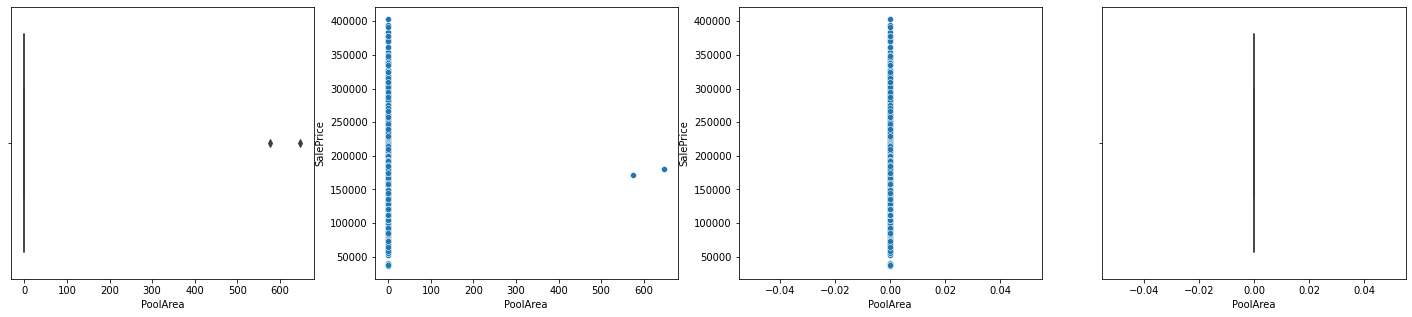

In [39]:
house = treat_Outliers(house,Analyse_Cols)

In [40]:
house.shape

(1136, 76)

In [41]:
#Function to check the distribution across the numeric data in the dataset
def distribution_Check(df,Cols):
    plt.figure(figsize=(25,15))
    fig = 1
    i = (len(Cols)//5)+1
    for col in Cols:
        plt.subplot(i, 5, fig)
        sns.distplot(df[col])
        fig = fig+1

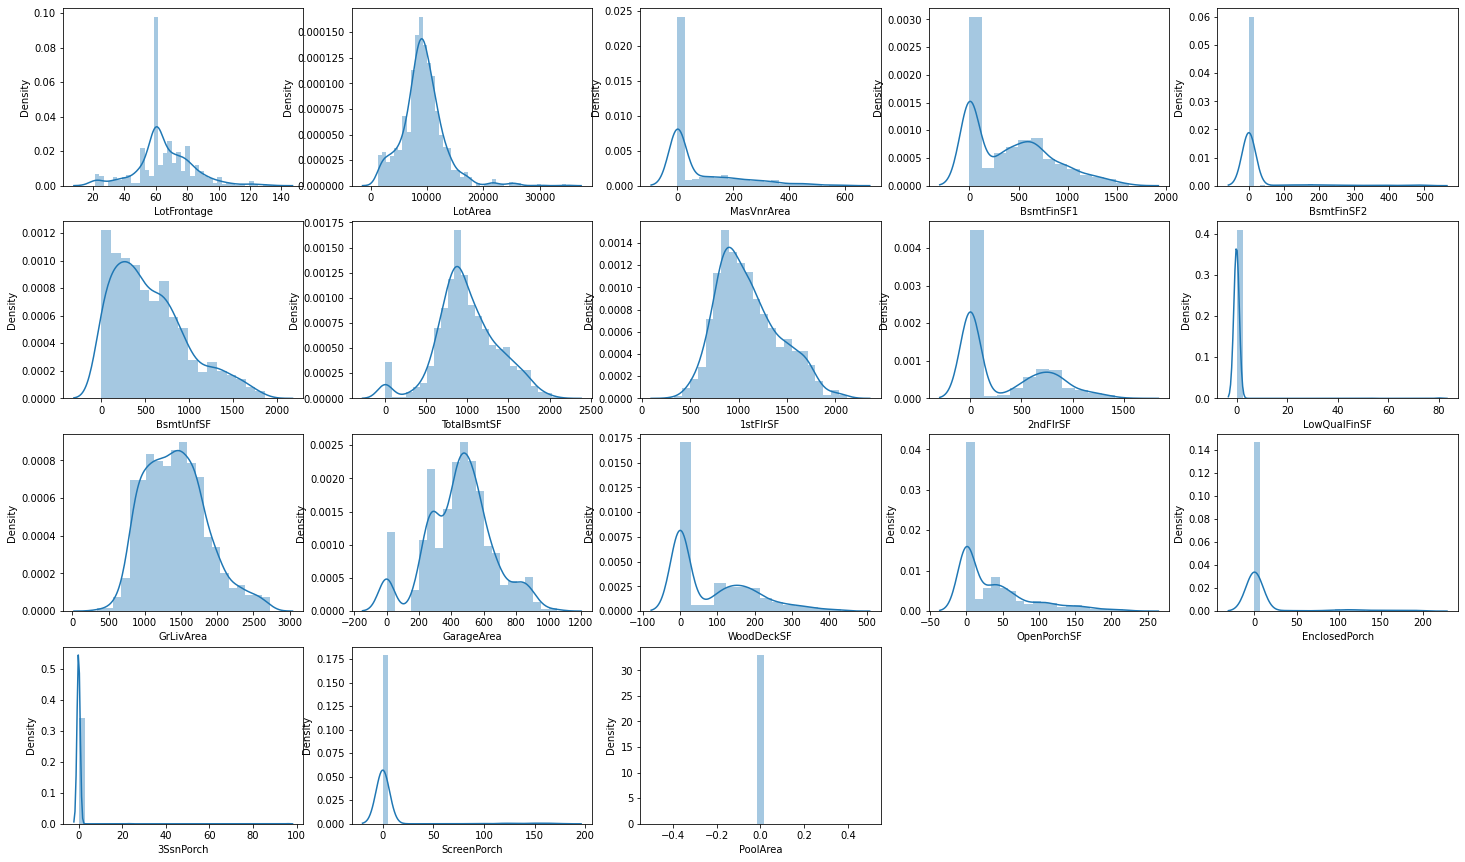

In [42]:
#Check the distribution of the data
distribution_Check(house,Analyse_Cols)

Observation:
    
    - We can notice a little Skeweness in some varibales -but its fine. 

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

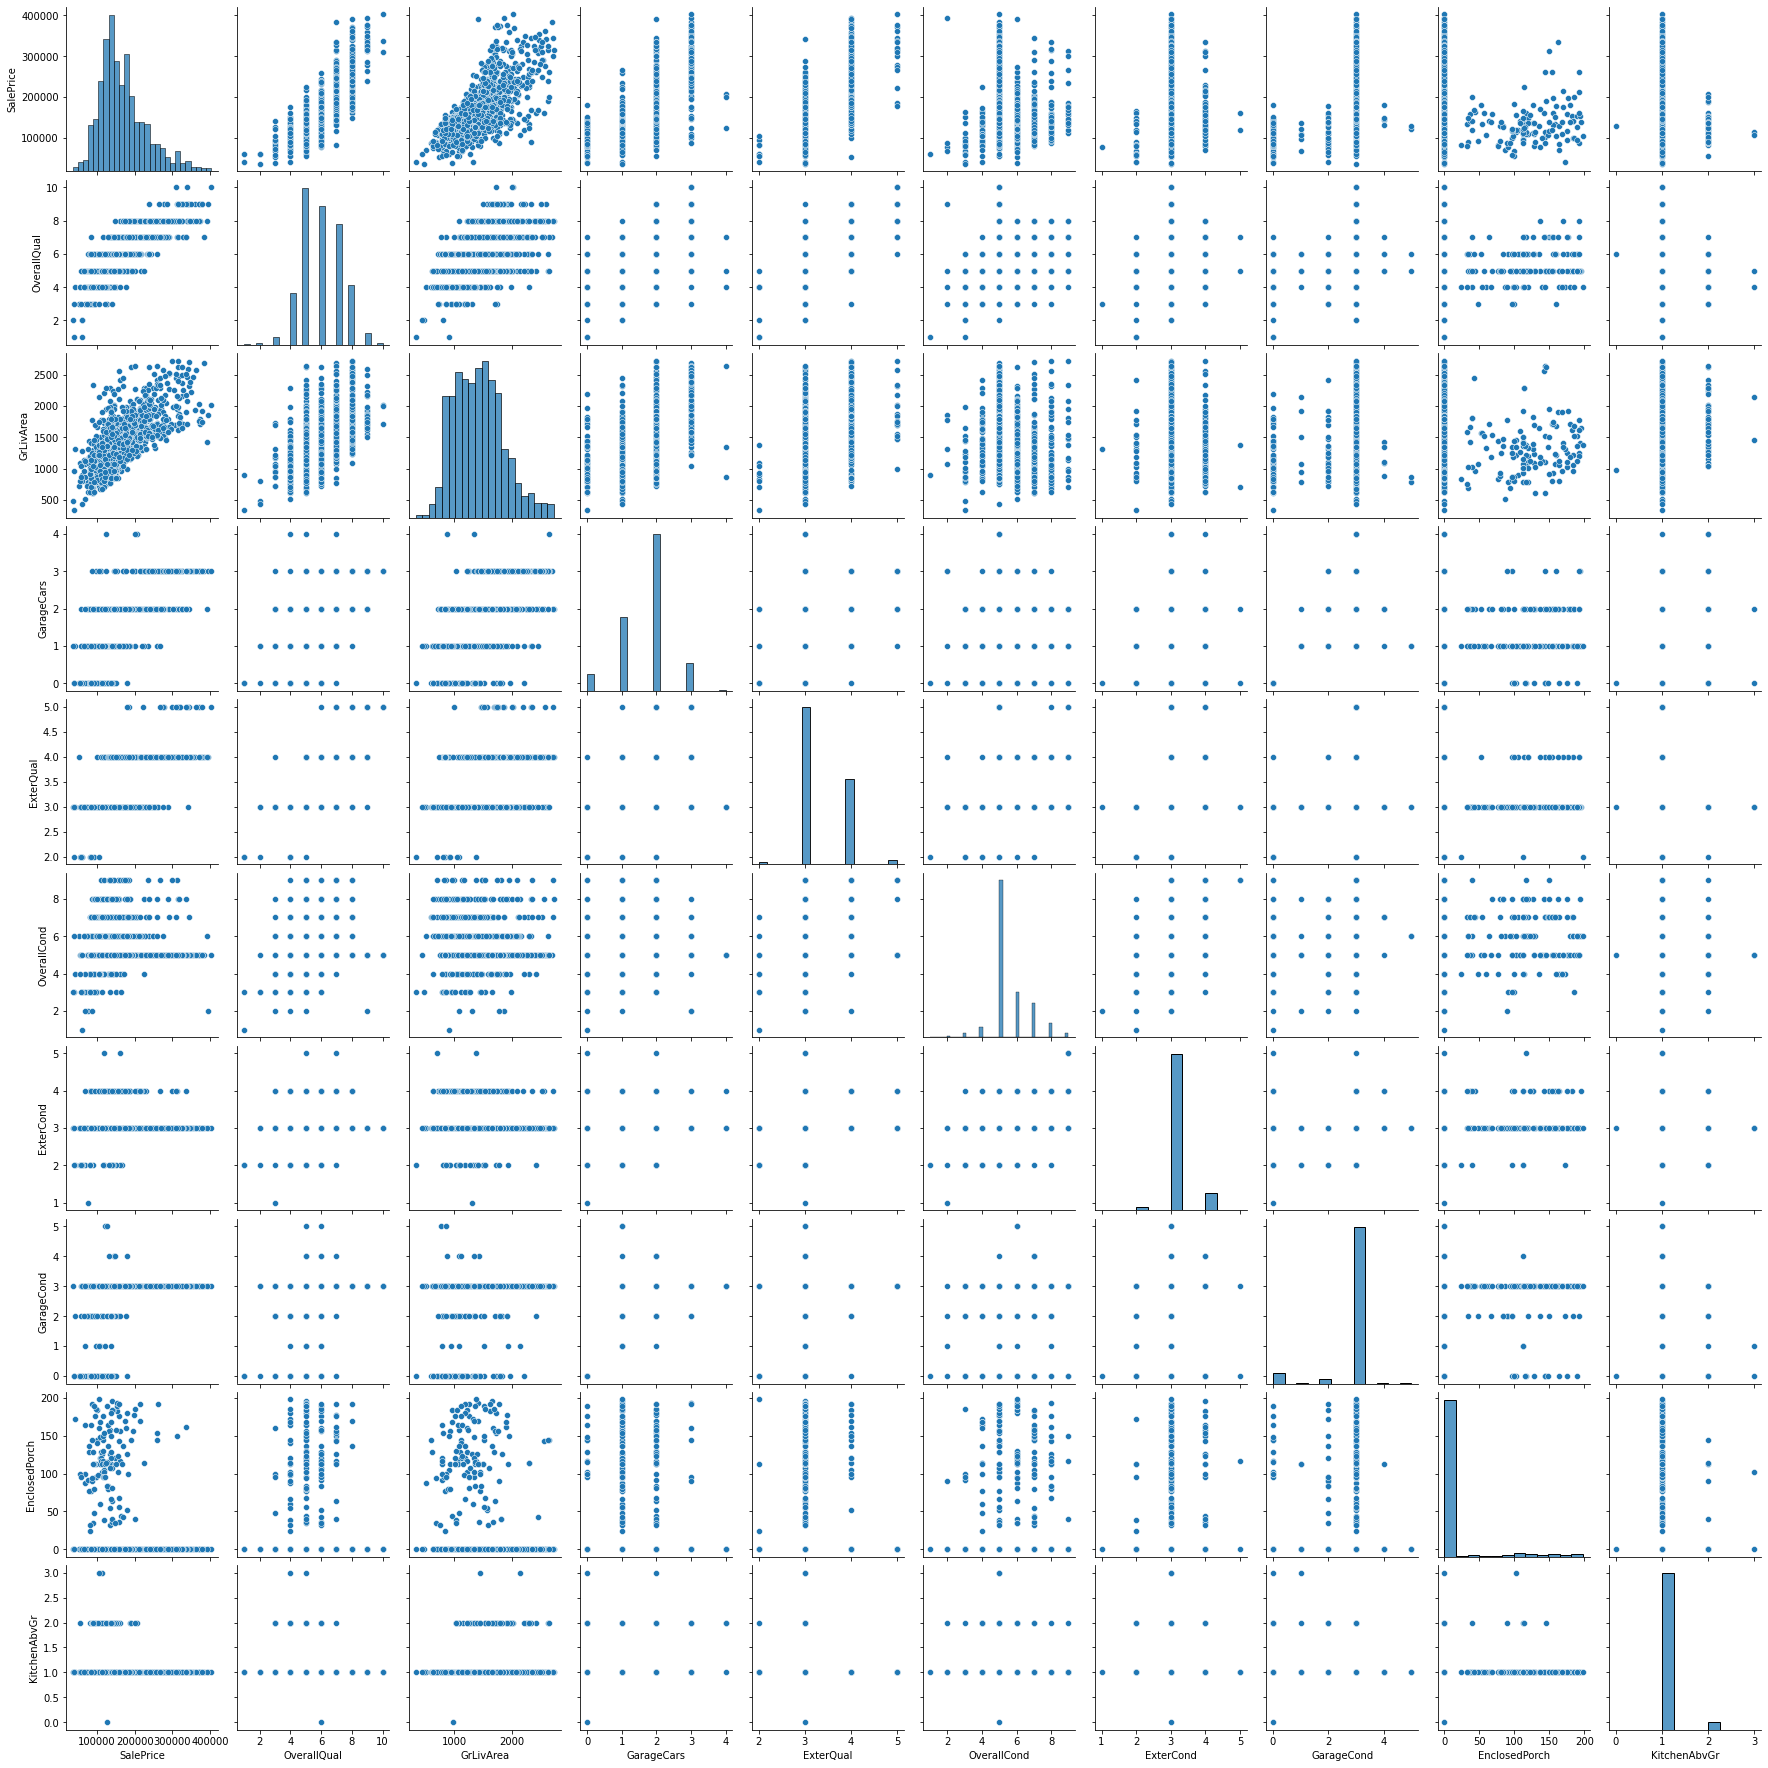

In [43]:
#plot pairplot to see the relationship b/w varibales
plt.figure(figsize=(30,30))
sns.pairplot(house[['SalePrice','OverallQual','GrLivArea','GarageCars','ExterQual','OverallCond','ExterCond','GarageCond','EnclosedPorch','KitchenAbvGr']])
plt.show()

Observation:
    
   - We can notice linearity betweenthe target variable `'SalePrice'` and other variables 
   - `SalePrice` is highly linear with `GrLivArea` ,`OverallQual`

`SalePrice` Vs `OverallQual`

<Figure size 720x504 with 0 Axes>

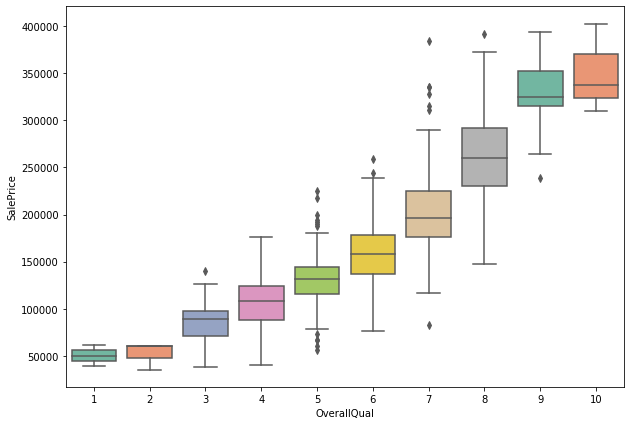

In [44]:
#'SalePrice' Vs 'OverallQual'
plt.figure(figsize=(10,7))
sns.boxplot(data=house,x='OverallQual',y='SalePrice',palette="Set2")
plt.show()

Observation:
    
   - `'OverallQual'` has postive impact on the sale value. 
   -  Higher the Quality higher the `SalePrice`

In [45]:
#Function for the analysis
def Analysis(df,xvar,yvar='SalePrice',hueval=None):
    sns.barplot(data=df,x=xvar,y=yvar,hue=hueval,palette='coolwarm')

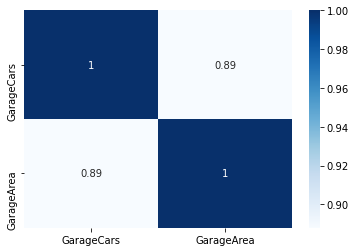

In [46]:
sns.heatmap(house[['GarageCars','GarageArea']].corr(),annot=True,cmap="Blues")

Observation:
    -`'GarageCars'` & `'GarageArea'` are highly correlated because in general, no:of cars accomodated is dependent on the GarageArea.
   
   - Let's drop `'GarageArea'` later after forming some new features

`'Utilities'` Vs `'SalePrice'`

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, "Before Outlier Treatment - 'Utilities Vs SalePrice'")

Text(0.5, 1.0, "After Outlier Treatment - 'Utilities Vs SalePrice'")

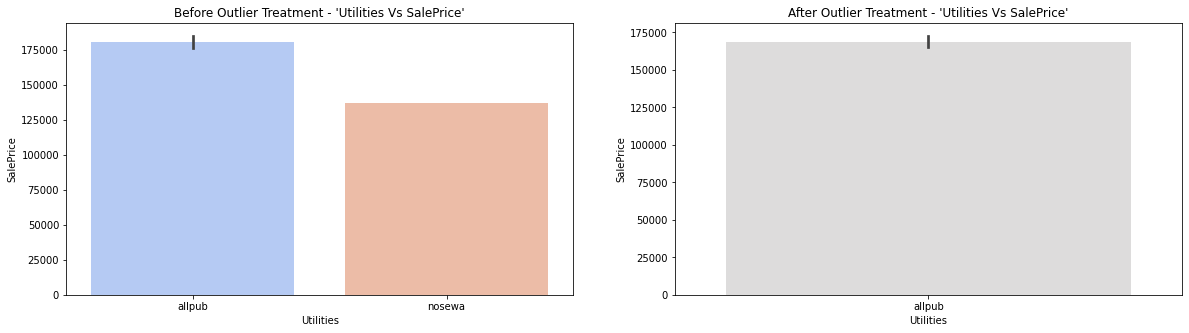

In [47]:
#Before treating Outliers 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plot1 =sns.barplot(data=house1,x='Utilities',y='SalePrice',palette='coolwarm')
plot1.set_title("Before Outlier Treatment - \'Utilities Vs SalePrice\'")
plt.subplot(1,2,2)
#Before treating Outliers 
plot2=sns.barplot(data=house,x='Utilities',y='SalePrice',palette='coolwarm')
plot2.set_title("After Outlier Treatment - \'Utilities Vs SalePrice\'")
plt.show()

Observation:
   - Usually, house with `All Public Utilities` have more Selling value
   -  After treating the outliers, Since, most of the houses have `AllPub` Utilities - i.e single value in the data.we are going to drop 'Utilities' 

In [48]:
#drop 'Utilities' from dataset
house.drop(columns=['Utilities'],inplace=True)

Let's Assign the values to the `'LandContour'` and `'LandSlope'` as well to define the level of contour /slope

LandContour: Flatness of the property

      - 4 : Lvl	Near Flat/Level	
      - 3 : Bnk	Banked - Quick and significant rise from street grade to building
      - 2 : HLS	Hillside - Significant slope from side to side
      - 1 : Low	Depression
      
LandSlope: Slope of property
		
      - 1 : Gtl	Gentle slope
      - 2 : Mod	Moderate Slope	
      - 3 : Sev	Severe Slope

In [49]:
#Mapping the values as stated above
house['LandContour'] = house['LandContour'].map({'lvl':4,'bnk':3,'hls':2,'low':1})
house['LandSlope'] = house['LandSlope'].map({'gtl':1,'mod':2,'sev':3})

In [50]:
house[['LandSlope','LandContour']].corr()

LandSlope  LandContour
LandSlope         1.00        -0.53
LandContour      -0.53         1.00

Observation:
    
   - `'LandSlope'` & `'LandContour'` are negatively correlated
   - Let's drop `'LandSlope'` 

In [51]:
#Drop `LandSlope`
house.drop(columns=['LandSlope'],inplace=True)

In [52]:
#Mapping the Month Number with the corresponding string
monthMapper = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
              9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
house['MoSold'] = house['MoSold'].map(monthMapper).astype(str)

 #### `Visualising Categorical Varibales in the dataset`

In [53]:
#Function for boxlpot 
def boxPlot(DataFrame,cols,wrt):
    plt.figure(figsize=(30,30))
    i = ((len(cols)//5)+1)
    fig = 1
    for col in cols:
        plt.subplot(i,5,fig)
        sns.boxplot(x = col, y = wrt, data = DataFrame,palette ='pastel')
        fig = fig + 1
    plt.show()

In [54]:
#Categorical Columns
categorical_Columns = list(set(house.columns)-set(house._get_numeric_data().columns))

In [55]:
#We have below no:of categorical variables
len(categorical_Columns)

26

In [56]:
#List of Categorical Variables
print(categorical_Columns)

['Condition2', 'MSSubClass', 'LotConfig', 'Exterior1st', 'Functional', 'CentralAir', 'Exterior2nd', 'SaleType', 'Street', 'LotShape', 'Foundation', 'MoSold', 'Heating', 'MasVnrType', 'HouseStyle', 'Neighborhood', 'GarageFinish', 'GarageType', 'MSZoning', 'SaleCondition', 'Condition1', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'BldgType', 'Electrical']


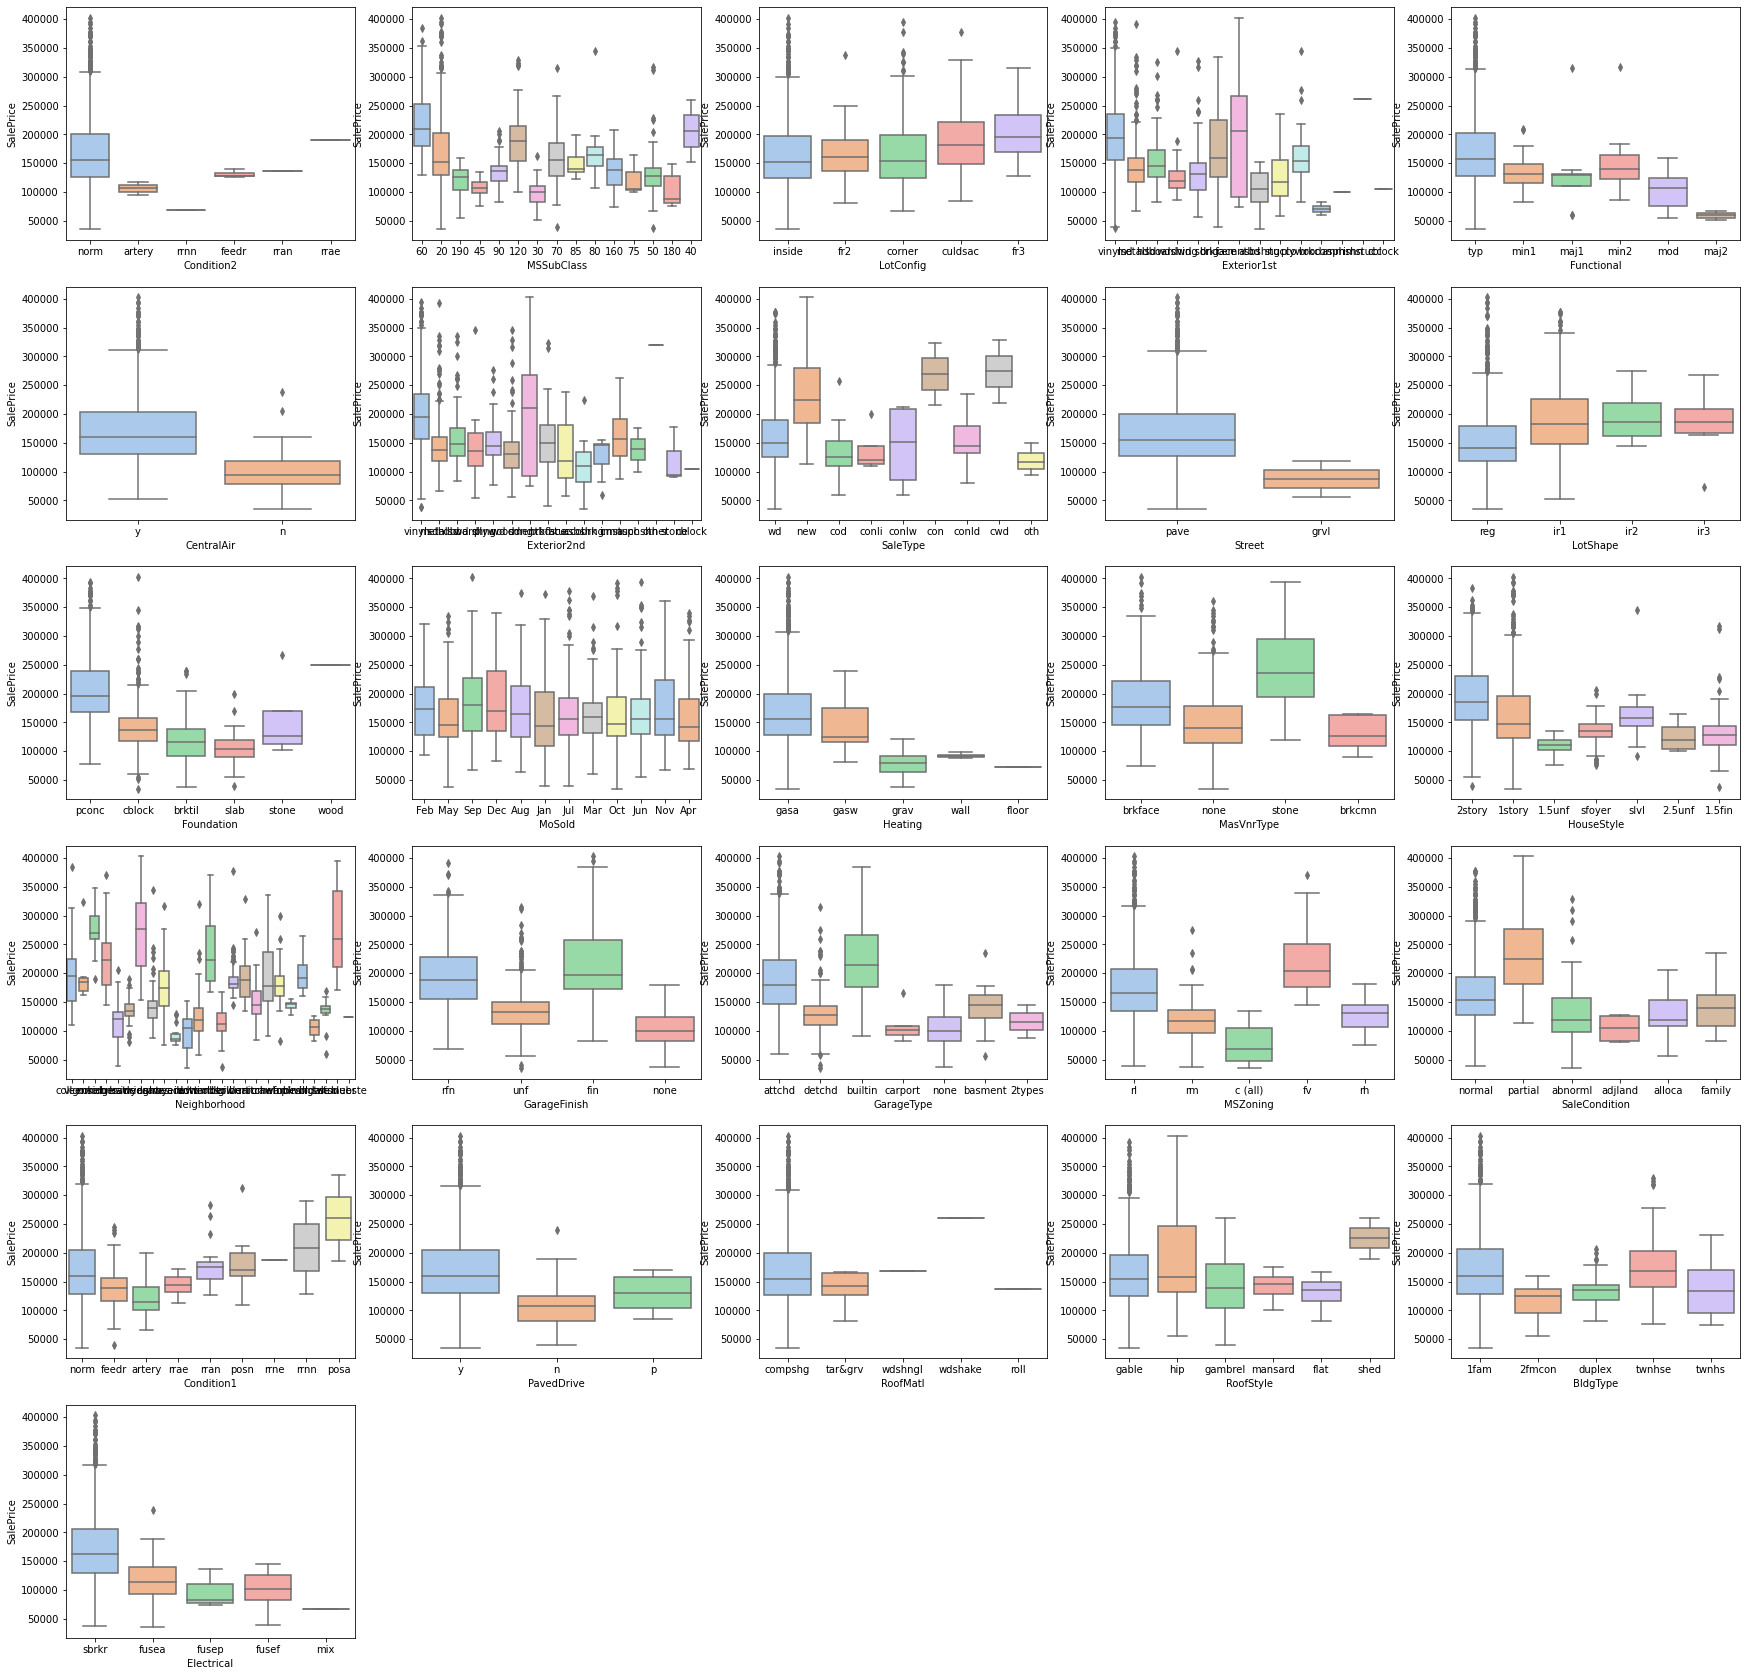

In [57]:
#Visualise the Categorical Columns
boxPlot(house,categorical_Columns,'SalePrice')

Observation: Some Insights from the above plot
    
   - `RoofStyle` : shed has higher sale value and most of the houses are- `Hip` style
   - `GarageType`: 'builtin' garages have higher salevalue
   - `HouseStyle`: '2Story' has higher salePrice
   - `MoSold`    : doesn't have any significance. But, at year end (Nov,Dec) 75% houses have high SalePrice
   - `LotShape`  : Similar across all but 'Reg' has lower SalePrice compared to others
   - `GarageFinish`: 'Finished' , 'Rough Finished' have greater SalePrice
   - `PavedDrive`: 'Paved' & 'Partial Pavement' have higher Sale Value compared to 'Dirt/Gravel'/N
   - `SaleType`  : 'new', nextto 'con' & 'cwd' have greater SalePrices
   - `Street`    : 'Paved' have higher SalePrice
   - `MasVnrType`: 'Stone' type has higher value
   - `CentralAir`: if there is central air conditioning , house has higher sale value

In [58]:
house.shape

(1136, 74)

#### Creating New derived Features

In [59]:
#house['TotalSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
house['TotalBathrooms'] = house['BsmtFullBath'] + (0.5*house['BsmtHalfBath']) + house['FullBath'] + (0.5*house['HalfBath'])
house['hasBsmtBathroom'] = house['BsmtFullBath'].apply(lambda x: 1 if x>0 else 0)
house['hasBsmtBathroom'] = house['BsmtHalfBath'].apply(lambda x: 1 if x>0 else 0)
house['has2ndFloor'] = house['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
house['hasGarage'] = house['GarageArea'].apply(lambda x: 1 if x>0 else 0)
house['hasBsmt'] = house['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
house['hasFireplace'] = house['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

TotalBsmtSF: BsmtFinSF2 + BsmtFinSF2 + BsmtUnfSF 

In [60]:
house.drop(columns=['BsmtFullBath','BsmtHalfBath','TotalBsmtSF'],inplace=True)

In [61]:
#Calculate if the house has remodelled or not
house['has_Remodelled'] = house.apply(lambda x: 0 if (x.YearBuilt == x.YearRemodAdd) else 1,axis=1)

In [62]:
#Calculate How old the garage is?
house['Garage_Age'] = house['YrSold']-house['GarageYrBlt']

In [63]:
#When there is no garage, I am considering the Age as -1
house['Garage_Age'] = house['Garage_Age'].apply(lambda x: -1 if x>2000 else x)

In [64]:
#Calculate How old the house is ?
house['house_Age'] = house['YrSold']-house['YearBuilt']

Dropping off the `'YrSold'` , `'YearBuilt'` , `'YearRemodAdd'` , `'GarageYrBlt'` Since we have derived metric `'house_Age'`, `'has_Remodelled'`, `'Garage_Age'`

In [65]:
#Drop the above stated columns
house.drop(columns=['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)

Dropping off the `'GarageArea'` as it is highly correlated with `'GarageCars'`

In [66]:
house.drop(columns=['GarageArea'],inplace=True)

In [67]:
house.shape

(1136, 75)

#### Creating Dummy Variables

In [68]:
house[categorical_Columns].head()

Condition2 MSSubClass LotConfig Exterior1st Functional CentralAir  \
0       norm         60    inside     vinylsd        typ          y   
1       norm         20       fr2     metalsd        typ          y   
2       norm         60    inside     vinylsd        typ          y   
4       norm         60       fr2     vinylsd        typ          y   
6       norm         20    inside     vinylsd        typ          y   

  Exterior2nd SaleType Street LotShape Foundation MoSold Heating MasVnrType  \
0     vinylsd       wd   pave      reg      pconc    Feb    gasa    brkface   
1     metalsd       wd   pave      reg     cblock    May    gasa       none   
2     vinylsd       wd   pave      ir1      pconc    Sep    gasa    brkface   
4     vinylsd       wd   pave      ir1      pconc    Dec    gasa    brkface   
6     vinylsd       wd   pave      reg      pconc    Aug    gasa      stone   

  HouseStyle Neighborhood GarageFinish GarageType MSZoning SaleCondition  \
0     2story      collgcr          rfn     attchd       rl        normal   
1     1story      veenker          rfn     attchd       rl        normal   
2     2story      collgcr          rfn     attchd       rl        normal   
4     2story      noridge          rfn     attchd       rl        normal   
6     1story      somerst          rfn     attchd       rl        normal   

  Condition1 PavedDrive RoofMatl RoofStyle BldgType Electrical  
0       norm          y  compshg     gable     1fam      sbrkr  
1      feedr          y  compshg     gable     1fam      sbrkr  
2       norm          y  compshg     gable     1fam      sbrkr  
4       norm          y  compshg     gable     1fam      sbrkr  
6       norm          y  compshg     gable     1fam      sbrkr

In [69]:
#Function to create dummy variables
def get_dummies(DataFrame,cols):
    for col in cols:
        col = pd.get_dummies(DataFrame[col],prefix=col, prefix_sep='_',drop_first = True)
        DataFrame = pd.concat([DataFrame,col],axis=1)
    DataFrame.drop(columns=cols,axis=1,inplace=True)
    return DataFrame

In [70]:
#Before creating Dummies , Column list
before_dummies = house.columns

In [71]:
#generating dummy_Variables for the categorical variables
house = get_dummies(house,categorical_Columns)

In [72]:
house.shape

(1136, 216)

In [73]:
after_dummies = house.columns

In [74]:
dummies = list(set(after_dummies)-set(before_dummies))
print(dummies)

['MasVnrType_stone', 'SaleCondition_normal', 'LotShape_reg', 'Exterior2nd_brk cmn', 'Neighborhood_sawyerw', 'Condition2_rrae', 'Condition1_feedr', 'Functional_typ', 'SaleType_con', 'RoofMatl_roll', 'LotShape_ir2', 'Heating_wall', 'LotShape_ir3', 'RoofStyle_shed', 'Functional_maj2', 'HouseStyle_sfoyer', 'SaleType_conld', 'Exterior1st_cemntbd', 'MSSubClass_45', 'Exterior1st_metalsd', 'Street_pave', 'LotConfig_fr3', 'MoSold_May', 'Foundation_cblock', 'MSSubClass_60', 'HouseStyle_2story', 'Neighborhood_crawfor', 'Exterior1st_brkcomm', 'MoSold_Jan', 'MSZoning_rl', 'MSSubClass_85', 'BldgType_2fmcon', 'LotConfig_fr2', 'Exterior2nd_wd shng', 'Neighborhood_oldtown', 'MSSubClass_80', 'MoSold_Jul', 'Foundation_slab', 'Neighborhood_noridge', 'Neighborhood_meadowv', 'Condition1_norm', 'MSSubClass_70', 'Heating_gasw', 'Neighborhood_clearcr', 'SaleCondition_alloca', 'SaleType_conli', 'MSSubClass_180', 'MoSold_Dec', 'Condition1_rrae', 'Foundation_stone', 'Neighborhood_gilbert', 'HouseStyle_1.5unf', 'M

In [75]:
#dropping the none categorical dummies from the dataset. As they won't add any value in our analysis
house.drop(columns=['MasVnrType_none','GarageType_none','GarageFinish_none'],inplace=True)

In [76]:
house.shape

(1136, 213)

Observation:
    
   - After creating dummies, We have `213` columns in our dataset `house`

### Model Building

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [77]:
# Split the dataframe 'house' into train and test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(house,train_size=0.7,test_size=0.3, random_state=42)

In [78]:
print("Train Dataset : ",df_train.shape)
print("Test Dataset : ",df_test.shape)

Train Dataset :  (795, 213)
Test Dataset :  (341, 213)


#### Scaling

Let's scale the numeric columns by using the MinMaxScaler()

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

We should `only scale the numeric variables`, We shouldn't scale `dummies` and binary 'yes/no' or '0/1'

Below `columns_ToScale` provides you the list of numeric columns

In [80]:
columns_ToScale = list((set(house._get_numeric_data().columns) - set(dummies)) - {'has_Remodelled','hasBsmt','hasGarage','hasFireplace','has2ndFloor','hasBsmtBathroom'})

In [81]:
df_train[columns_ToScale].describe()

BsmtFinSF2  BsmtUnfSF  TotalBathrooms  PoolArea  Fireplaces  \
count      795.00     795.00          795.00    795.00      795.00   
mean        20.43     561.58            2.14      0.00        0.54   
std         81.22     415.59            0.75      0.00        0.62   
min          0.00       0.00            1.00      0.00        0.00   
25%          0.00     240.50            1.50      0.00        0.00   
50%          0.00     486.00            2.00      0.00        0.00   
75%          0.00     811.00            2.50      0.00        1.00   
max        506.00    1869.00            5.00      0.00        3.00   

       GarageQual  LotArea  house_Age  2ndFlrSF  BsmtExposure  ExterCond  \
count      795.00   795.00     795.00    795.00        795.00     795.00   
mean         2.80  9352.63      34.87    333.54          0.63       3.07   
std          0.72  3704.86      29.25    413.74          1.00       0.33   
min          0.00  1477.00       0.00      0.00          0.00       1.00   
25%          3.00  7417.50       7.00      0.00          0.00       3.00   
50%          3.00  9200.00      33.00      0.00          0.00       3.00   
75%          3.00 11147.50      53.00    715.00          1.00       3.00   
max          5.00 29959.00     127.00   1540.00          3.00       5.00   

       BsmtFinType1  WoodDeckSF  FullBath  GrLivArea  TotRmsAbvGrd  \
count        795.00      795.00    795.00     795.00        795.00   
mean           2.52       86.81      1.54    1430.01          6.36   
std            2.10      107.09      0.53     428.38          1.51   
min            0.00        0.00      0.00     334.00          2.00   
25%            0.00        0.00      1.00    1097.00          5.00   
50%            3.00        0.00      2.00    1412.00          6.00   
75%            5.00      168.00      2.00    1709.00          7.00   
max            5.00      426.00      3.00    2715.00         12.00   

       LandContour  LowQualFinSF  FireplaceQu  ScreenPorch  HeatingQC  \
count       795.00        795.00       795.00       795.00     795.00   
mean          3.85          0.37         1.64         5.34       4.16   
std           0.56          5.25         1.79        26.97       0.95   
min           1.00          0.00         0.00         0.00       2.00   
25%           4.00          0.00         0.00         0.00       3.00   
50%           4.00          0.00         0.00         0.00       5.00   
75%           4.00          0.00         3.00         0.00       5.00   
max           4.00         80.00         5.00       176.00       5.00   

       BsmtFinType2  BedroomAbvGr  Garage_Age  MasVnrArea  BsmtFinSF1  \
count        795.00        795.00      795.00      795.00      795.00   
mean           0.17          2.85       27.41       82.03      419.38   
std            0.65          0.78       25.10      131.17      412.18   
min            0.00          0.00       -1.00        0.00        0.00   
25%            0.00          2.00        4.00        0.00        0.00   
50%            0.00          3.00       22.00        0.00      384.00   
75%            0.00          3.00       46.00      144.50      696.50   
max            5.00          6.00       99.00      594.00     1573.00   

       BsmtQual  GarageCars  HalfBath  KitchenAbvGr  3SsnPorch  MiscVal  \
count    795.00      795.00    795.00        795.00     795.00   795.00   
mean       3.46        1.71      0.38          1.06       0.12    55.98   
std        0.89        0.74      0.51          0.24       3.40   654.70   
min        0.00        0.00      0.00          0.00       0.00     0.00   
25%        3.00        1.00      0.00          1.00       0.00     0.00   
50%        4.00        2.00      0.00          1.00       0.00     0.00   
75%        4.00        2.00      1.00          1.00       0.00     0.00   
max        5.00        4.00      2.00          3.00      96.00 15500.00   

       ExterQual  1stFlrSF  SalePrice  KitchenQual  EnclosedPorch  B

In [82]:
#Applying scaling on the train dataset
df_train[columns_ToScale] = scaler.fit_transform(df_train[columns_ToScale])

In [83]:
df_train[columns_ToScale].describe()

BsmtFinSF2  BsmtUnfSF  TotalBathrooms  PoolArea  Fireplaces  \
count      795.00     795.00          795.00    795.00      795.00   
mean         0.04       0.30            0.29      0.00        0.18   
std          0.16       0.22            0.19      0.00        0.21   
min          0.00       0.00            0.00      0.00        0.00   
25%          0.00       0.13            0.12      0.00        0.00   
50%          0.00       0.26            0.25      0.00        0.00   
75%          0.00       0.43            0.38      0.00        0.33   
max          1.00       1.00            1.00      0.00        1.00   

       GarageQual  LotArea  house_Age  2ndFlrSF  BsmtExposure  ExterCond  \
count      795.00   795.00     795.00    795.00        795.00     795.00   
mean         0.56     0.28       0.27      0.22          0.21       0.52   
std          0.14     0.13       0.23      0.27          0.33       0.08   
min          0.00     0.00       0.00      0.00          0.00       0.00   
25%          0.60     0.21       0.06      0.00          0.00       0.50   
50%          0.60     0.27       0.26      0.00          0.00       0.50   
75%          0.60     0.34       0.42      0.46          0.33       0.50   
max          1.00     1.00       1.00      1.00          1.00       1.00   

       BsmtFinType1  WoodDeckSF  FullBath  GrLivArea  TotRmsAbvGrd  \
count        795.00      795.00    795.00     795.00        795.00   
mean           0.50        0.20      0.51       0.46          0.44   
std            0.42        0.25      0.18       0.18          0.15   
min            0.00        0.00      0.00       0.00          0.00   
25%            0.00        0.00      0.33       0.32          0.30   
50%            0.60        0.00      0.67       0.45          0.40   
75%            1.00        0.39      0.67       0.58          0.50   
max            1.00        1.00      1.00       1.00          1.00   

       LandContour  LowQualFinSF  FireplaceQu  ScreenPorch  HeatingQC  \
count       795.00        795.00       795.00       795.00     795.00   
mean          0.95          0.00         0.33         0.03       0.72   
std           0.19          0.07         0.36         0.15       0.32   
min           0.00          0.00         0.00         0.00       0.00   
25%           1.00          0.00         0.00         0.00       0.33   
50%           1.00          0.00         0.00         0.00       1.00   
75%           1.00          0.00         0.60         0.00       1.00   
max           1.00          1.00         1.00         1.00       1.00   

       BsmtFinType2  BedroomAbvGr  Garage_Age  MasVnrArea  BsmtFinSF1  \
count        795.00        795.00      795.00      795.00      795.00   
mean           0.03          0.48        0.28        0.14        0.27   
std            0.13          0.13        0.25        0.22        0.26   
min            0.00          0.00        0.00        0.00        0.00   
25%            0.00          0.33        0.05        0.00        0.00   
50%            0.00          0.50        0.23        0.00        0.24   
75%            0.00          0.50        0.47        0.24        0.44   
max            1.00          1.00        1.00        1.00        1.00   

       BsmtQual  GarageCars  HalfBath  KitchenAbvGr  3SsnPorch  MiscVal  \
count    795.00      795.00    795.00        795.00     795.00   795.00   
mean       0.69        0.43      0.19          0.35       0.00     0.00   
std        0.18        0.18      0.25          0.08       0.04     0.04   
min        0.00        0.00      0.00          0.00       0.00     0.00   
25%        0.60        0.25      0.00          0.33       0.00     0.00   
50%        0.80        0.50      0.00          0.33       0.00     0.00   
75%        0.80        0.50      0.50          0.33       0.00     0.00   
max        1.00        1.00      1.00          1.00       1.00     1.00   

       ExterQual  1stFlrSF  SalePrice  KitchenQual  EnclosedPorch  B

Observation:
    
- After appling `MinMaxScaling`, all the values are scaled between `(0,1)`

In [84]:
df_train.describe()

LotFrontage  LotArea  LandContour  OverallQual  OverallCond  \
count       795.00   795.00       795.00       795.00       795.00   
mean          0.40     0.28         0.95         0.55         0.56   
std           0.16     0.13         0.19         0.15         0.13   
min           0.00     0.00         0.00         0.00         0.00   
25%           0.35     0.21         1.00         0.44         0.50   
50%           0.37     0.27         1.00         0.56         0.50   
75%           0.50     0.34         1.00         0.67         0.62   
max           1.00     1.00         1.00         1.00         1.00   

       MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
count      795.00     795.00     795.00    795.00    795.00        795.00   
mean         0.14       0.45       0.52      0.69      0.73          0.21   
std          0.22       0.18       0.08      0.18      0.14          0.33   
min          0.00       0.00       0.00      0.00      0.00          0.00   
25%          0.00       0.33       0.50      0.60      0.75          0.00   
50%          0.00       0.33       0.50      0.80      0.75          0.00   
75%          0.24       0.67       0.50      0.80      0.75          0.33   
max          1.00       1.00       1.00      1.00      1.00          1.00   

       BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
count        795.00      795.00        795.00      795.00     795.00   
mean           0.50        0.27          0.03        0.04       0.30   
std            0.42        0.26          0.13        0.16       0.22   
min            0.00        0.00          0.00        0.00       0.00   
25%            0.00        0.00          0.00        0.00       0.13   
50%            0.60        0.24          0.00        0.00       0.26   
75%            1.00        0.44          0.00        0.00       0.43   
max            1.00        1.00          1.00        1.00       1.00   

       HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
count     795.00    795.00    795.00        795.00     795.00    795.00   
mean        0.72      0.43      0.22          0.00       0.46      0.51   
std         0.32      0.18      0.27          0.07       0.18      0.18   
min         0.00      0.00      0.00          0.00       0.00      0.00   
25%         0.33      0.30      0.00          0.00       0.32      0.33   
50%         1.00      0.40      0.00          0.00       0.45      0.67   
75%         1.00      0.54      0.46          0.00       0.58      0.67   
max         1.00      1.00      1.00          1.00       1.00      1.00   

       HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
count    795.00        795.00        795.00       795.00        795.00   
mean       0.19          0.48          0.35         0.49          0.44   
std        0.25          0.13          0.08         0.21          0.15   
min        0.00          0.00          0.00         0.00          0.00   
25%        0.00          0.33          0.33         0.33          0.30   
50%        0.00          0.50          0.33         0.33          0.40   
75%        0.50          0.50          0.33         0.67          0.50   
max        1.00          1.00          1.00         1.00          1.00   

       Fireplaces  FireplaceQu  GarageCars  GarageQual  GarageCond  \
count      795.00       795.00      795.00      795.00      795.00   
mean         0.18         0.33        0.43        0.56        0.56   
std          0.21         0.36        0.18        0.14        0.14   
min          0.00         0.00        0.00        0.00        0.00   
25%          0.00         0.00        0.25        0.60        0.60   
50%          0.00         0.00        0.50        0.60        0.60   
75%          0.33         0.60        0.50        0.60        0.60   
max          1.00         1.00        1.00        1.00        1.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  S

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

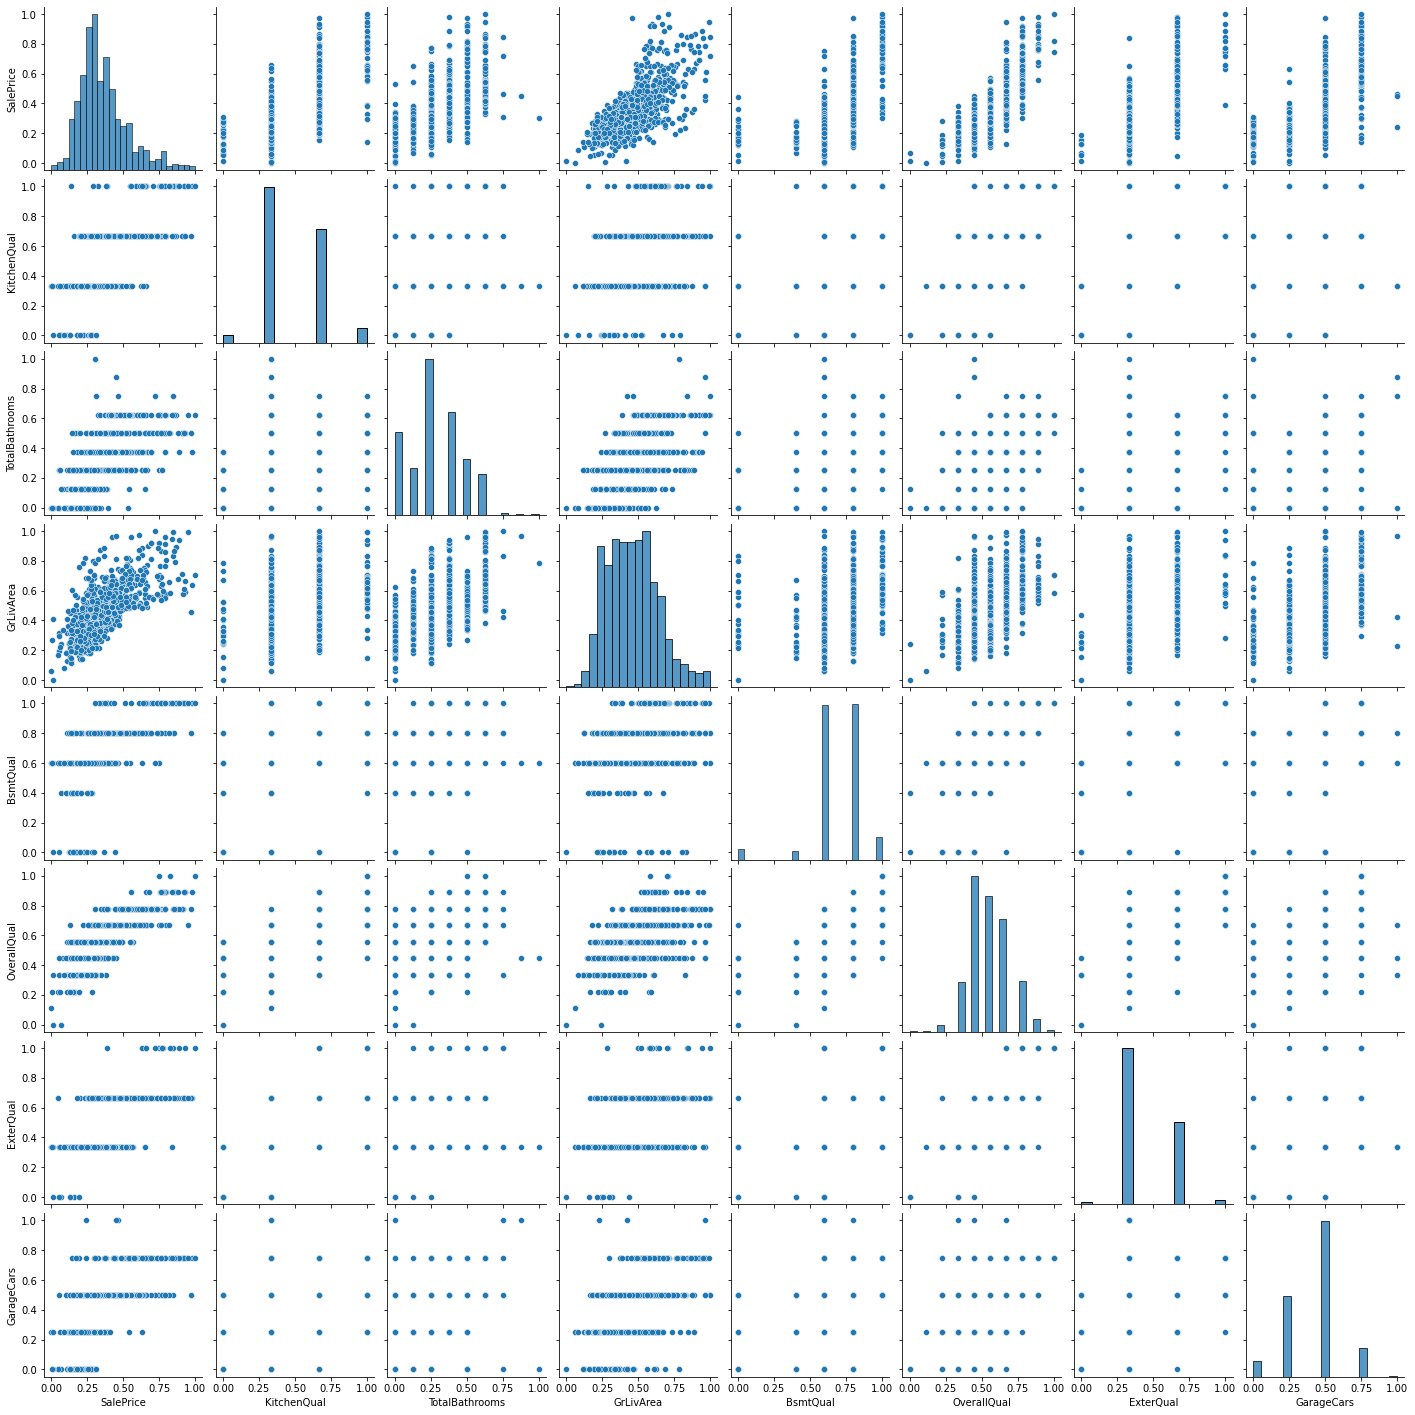

In [85]:
plt.figure(figsize=(30,30))
sns.pairplot(df_train[['SalePrice','KitchenQual','TotalBathrooms','GrLivArea','BsmtQual','OverallQual','ExterQual','GarageCars']])
plt.show()

<Figure size 2160x2160 with 0 Axes>

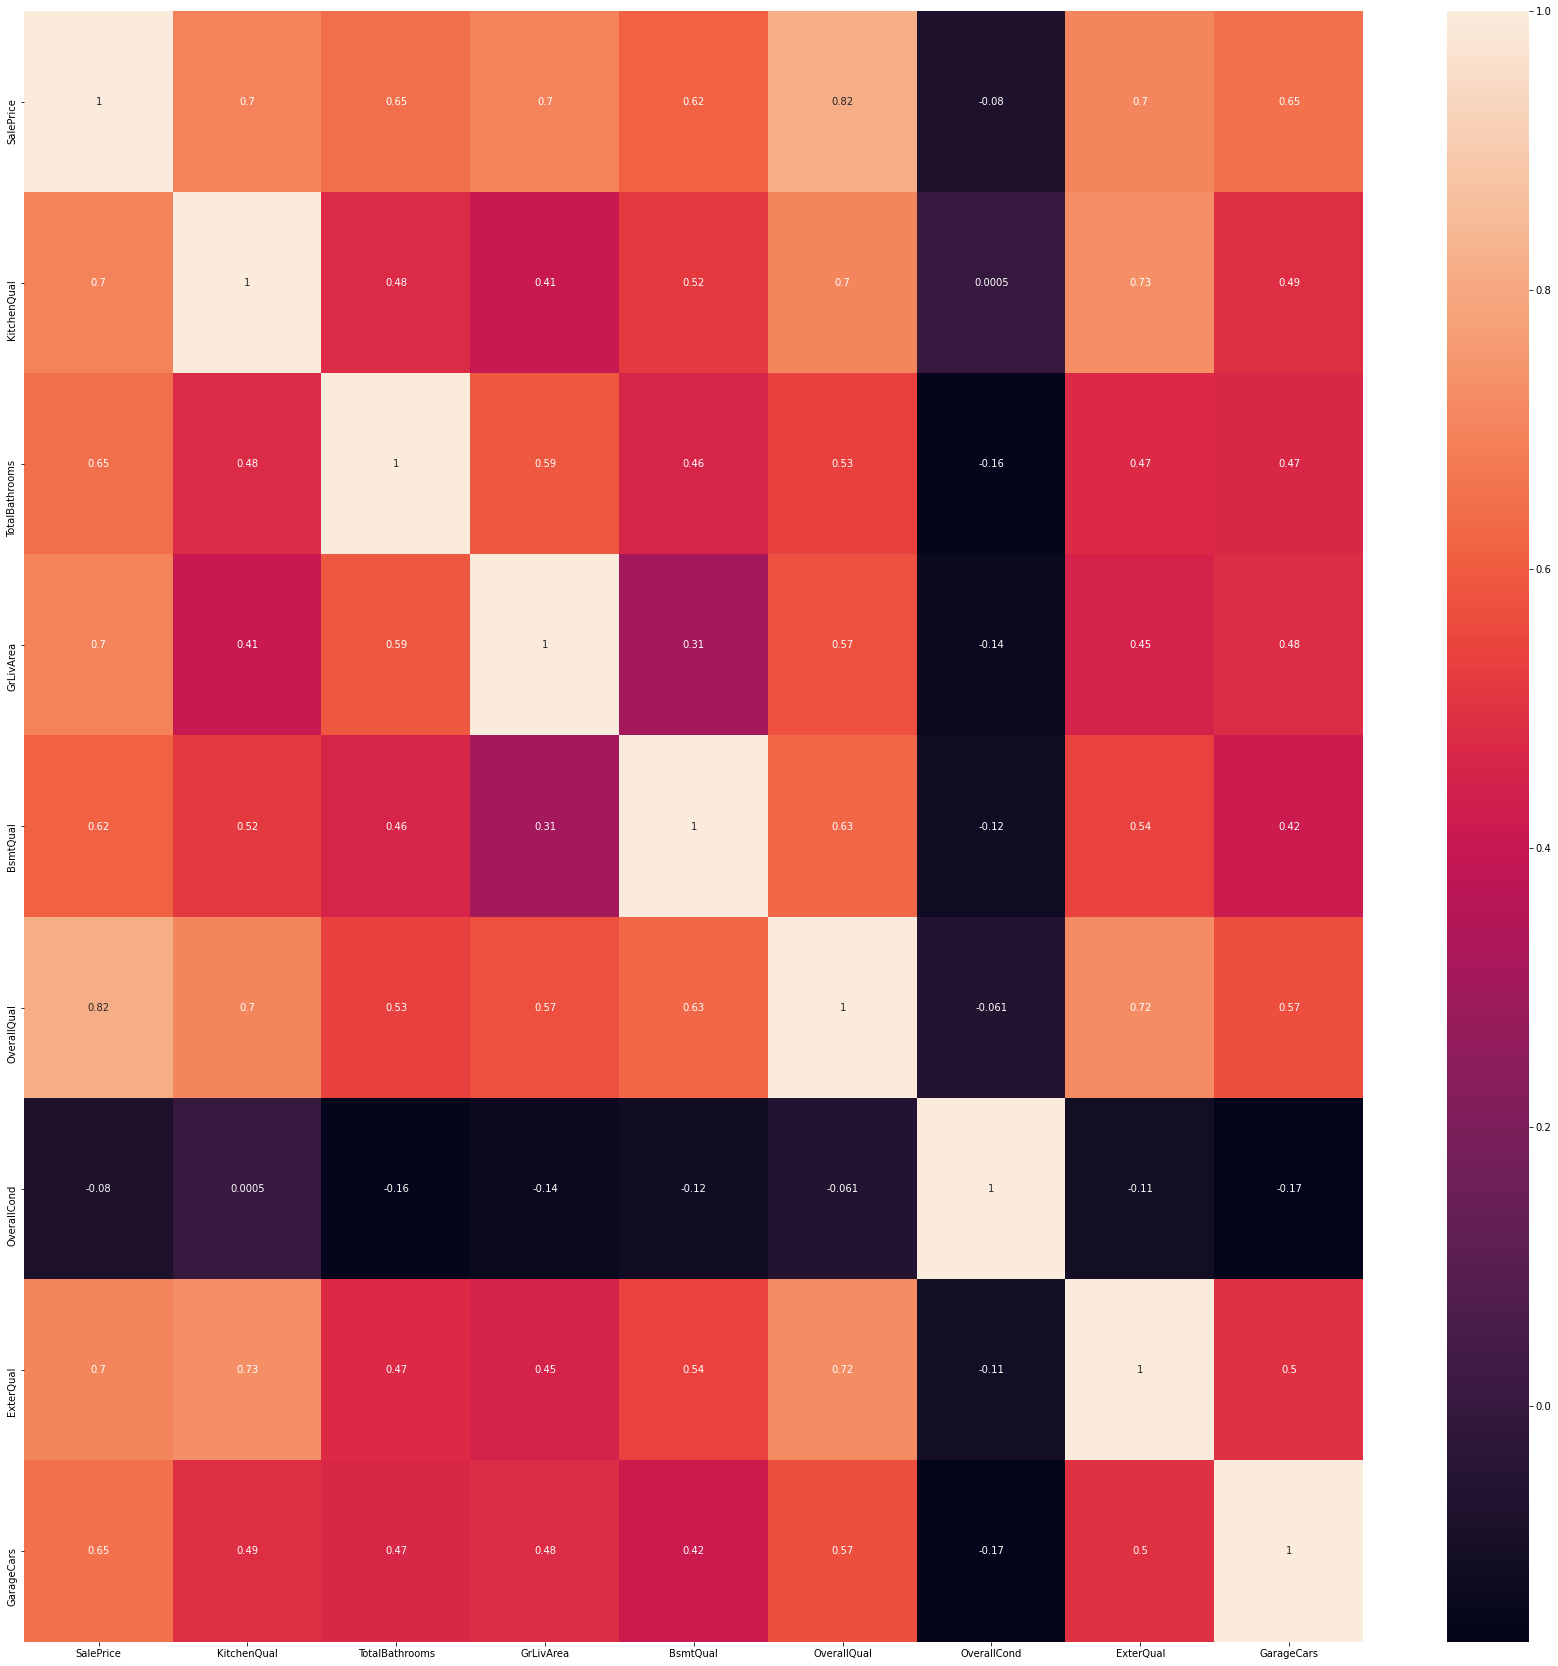

In [86]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train[['SalePrice','KitchenQual','TotalBathrooms','GrLivArea','BsmtQual','OverallQual','OverallCond','ExterQual','GarageCars']].corr(),annot=True)
plt.show()

Observation:
    
   - So much muliticollinearity exists , we will deal this using VIF values

Dividing `df_train` into `'X_train'` & `'y_train'` for model building

In [87]:
#temporary dataset to hold df_train
df_train1 = df_train

In [88]:
y_train = df_train.pop('SalePrice')
X_train = df_train

`Building Model using the RFE`

In [92]:
#Building Model using the RFE

# Importing RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Applying RFE to obtain 30 features
lm = LinearRegression()
rfe = RFE(lm, 30)

# fitting the train data
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 50),
 ('LotArea', True, 1),
 ('LandContour', False, 147),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 59),
 ('ExterQual', True, 1),
 ('ExterCond', False, 72),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 105),
 ('BsmtExposure', False, 37),
 ('BsmtFinType1', False, 41),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 143),
 ('BsmtFinSF2', False, 80),
 ('BsmtUnfSF', True, 1),
 ('HeatingQC', False, 123),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 12),
 ('GrLivArea', True, 1),
 ('FullBath', False, 113),
 ('HalfBath', False, 178),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 139),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 165),
 ('Fireplaces', False, 40),
 ('FireplaceQu', False, 44),
 ('GarageCars', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', False, 109),
 ('WoodDeckSF', False, 45),
 ('OpenPorchSF', False, 56),
 ('EnclosedPorch', False, 126),
 ('3SsnPorch', False, 89),
 ('Scr

In [94]:
#columns which the rfe model  selected
col = X_train.columns[rfe.support_]
print("Columns Selected by rfe:",col)

Columns Selected by rfe: Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'GarageCars', 'GarageQual', 'hasGarage', 'hasBsmt',
       'house_Age', 'Exterior1st_brkcomm', 'SaleType_conli', 'SaleType_cwd',
       'Street_pave', 'Neighborhood_nridght', 'Neighborhood_stonebr',
       'SaleCondition_adjland', 'Condition1_posa', 'Condition1_rrnn',
       'RoofMatl_wdshake', 'RoofStyle_gable', 'RoofStyle_gambrel',
       'RoofStyle_hip', 'RoofStyle_mansard'],
      dtype='object')


Columns selected by RFE on first run :
    - ['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'hasGarage', 'hasBsmt', 'house_Age', 'Condition1_posa',
       'Condition1_rrnn', 'Exterior1st_brkcomm', 'SaleType_cwd',
       'BldgType_duplex', 'Street_pave', 'Neighborhood_nridght',
       'Neighborhood_stonebr', 'RoofMatl_wdshake', 'LotConfig_fr3',
       'SaleCondition_adjland', 'RoofStyle_gable', 'RoofStyle_gambrel',
       'RoofStyle_hip', 'RoofStyle_mansard', 'RoofStyle_shed']
       
Note:

On every run, the rfe feaature selection keeps changing, So, I am going to use the first subset inorder to maintain the execution flow through entire notebook.

In [95]:
#RFE selected features
col = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'hasGarage', 'hasBsmt', 'house_Age', 'Condition1_posa',
       'Condition1_rrnn', 'Exterior1st_brkcomm', 'SaleType_cwd',
       'BldgType_duplex', 'Street_pave', 'Neighborhood_nridght',
       'Neighborhood_stonebr', 'RoofMatl_wdshake', 'LotConfig_fr3',
       'SaleCondition_adjland', 'RoofStyle_gable', 'RoofStyle_gambrel',
       'RoofStyle_hip', 'RoofStyle_mansard', 'RoofStyle_shed']

#### Building model using statsmodel, for the detailed statistics

In [96]:
#Function to build Linear Model
def build_linearModel(X_train):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train)

    # Running the linear model
    lm= sm.OLS(y_train,X_train_lm).fit()  
    
    print(lm.summary())
    
    return lm

In [97]:
#Function to calculate VIF values
def VIF_values(X_train):
    vif = pd.DataFrame()
    X= X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [98]:
# Creating X_train_lm_1 dataframe with RFE selected variables
X_train_lm_1 = X_train[col]

In [99]:
#Building the linear model with the RFE selected features 'X_train_lm_1'
lm_1 = build_linearModel(X_train_lm_1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:03   Log-Likelihood:                 1190.7
No. Observations:                 795   AIC:                            -2319.
Df Residuals:                     764   BIC:                            -2174.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.36

In [100]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_1)

                 Features      VIF
8               GrLivArea 51732.36
6                1stFlrSF 25609.54
7                2ndFlrSF 10540.15
19            Street_pave   362.32
25        RoofStyle_gable   270.46
12                hasBsmt   142.83
3                BsmtQual    93.15
1             OverallQual    56.59
27          RoofStyle_hip    54.14
11              hasGarage    31.40
2             OverallCond    25.81
5               BsmtUnfSF    20.49
10             GarageCars    17.93
4              BsmtFinSF1    15.60
9             KitchenQual    15.27
0                 LotArea     7.28
13              house_Age     7.25
26      RoofStyle_gambrel     3.76
29         RoofStyle_shed     2.91
28      RoofStyle_mansard     2.71
22       RoofMatl_wdshake     2.07
16    Exterior1st_brkcomm     1.46
18        BldgType_duplex     1.39
20   Neighborhood_nridght     1.38
24  SaleCondition_adjland     1.24
21   Neighborhood_stonebr     1.11
23          LotConfig_fr3     1.05
17           SaleTyp

In [101]:
# Creating 'X_train_lm_2' dataframe by dropping 'GrLivArea' due to  high VIF value
X_train_lm_2 = X_train_lm_1.drop(['GrLivArea'],axis=1)

lm_2 = build_linearModel(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     238.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:05   Log-Likelihood:                 1190.3
No. Observations:                 795   AIC:                            -2321.
Df Residuals:                     765   BIC:                            -2180.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.36

In [102]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_2)

                 Features    VIF
18            Street_pave 362.02
24        RoofStyle_gable 270.46
11                hasBsmt 142.75
3                BsmtQual  93.15
1             OverallQual  56.51
26          RoofStyle_hip  54.14
10              hasGarage  31.40
6                1stFlrSF  29.45
2             OverallCond  25.81
5               BsmtUnfSF  20.47
9              GarageCars  17.92
4              BsmtFinSF1  15.57
8             KitchenQual  15.26
0                 LotArea   7.26
12              house_Age   7.25
25      RoofStyle_gambrel   3.76
7                2ndFlrSF   3.24
28         RoofStyle_shed   2.91
27      RoofStyle_mansard   2.71
21       RoofMatl_wdshake   2.07
15    Exterior1st_brkcomm   1.46
17        BldgType_duplex   1.39
19   Neighborhood_nridght   1.38
23  SaleCondition_adjland   1.24
20   Neighborhood_stonebr   1.11
22          LotConfig_fr3   1.05
16           SaleType_cwd   1.03
13        Condition1_posa   1.03
14        Condition1_rrnn   1.02


In [103]:
# Creating 'X_train_lm_3' dataframe by dropping 'Street_pave' due to high VIF 
X_train_lm_3 = X_train_lm_2.drop(['Street_pave'],axis=1)

lm_3 = build_linearModel(X_train_lm_3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:06   Log-Likelihood:                 1187.9
No. Observations:                 795   AIC:                            -2318.
Df Residuals:                     766   BIC:                            -2182.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [104]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_3)

                 Features    VIF
11                hasBsmt 141.24
3                BsmtQual  93.13
23        RoofStyle_gable  67.84
1             OverallQual  56.34
10              hasGarage  31.20
6                1stFlrSF  29.38
2             OverallCond  25.44
5               BsmtUnfSF  20.40
9              GarageCars  17.75
4              BsmtFinSF1  15.56
25          RoofStyle_hip  14.94
8             KitchenQual  14.93
12              house_Age   7.23
0                 LotArea   7.13
7                2ndFlrSF   3.24
27         RoofStyle_shed   2.36
20       RoofMatl_wdshake   2.07
24      RoofStyle_gambrel   1.84
26      RoofStyle_mansard   1.50
18   Neighborhood_nridght   1.38
17        BldgType_duplex   1.35
22  SaleCondition_adjland   1.13
19   Neighborhood_stonebr   1.10
15    Exterior1st_brkcomm   1.06
21          LotConfig_fr3   1.05
16           SaleType_cwd   1.03
13        Condition1_posa   1.03
14        Condition1_rrnn   1.02


In [105]:
# Creating 'X_train_lm_4' dataframe by dropping 'hasBsmt' due to high VIF
X_train_lm_4 = X_train_lm_3.drop(['hasBsmt'],axis=1)

lm_4 = build_linearModel(X_train_lm_4)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:08   Log-Likelihood:                 1176.7
No. Observations:                 795   AIC:                            -2297.
Df Residuals:                     767   BIC:                            -2166.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

In [106]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_4)

                 Features   VIF
22        RoofStyle_gable 59.03
1             OverallQual 55.65
3                BsmtQual 51.02
10              hasGarage 29.88
6                1stFlrSF 26.21
2             OverallCond 24.46
9              GarageCars 17.40
5               BsmtUnfSF 16.03
8             KitchenQual 14.69
24          RoofStyle_hip 13.19
4              BsmtFinSF1 12.59
0                 LotArea  7.12
11              house_Age  6.40
7                2ndFlrSF  3.23
26         RoofStyle_shed  2.34
19       RoofMatl_wdshake  2.07
23      RoofStyle_gambrel  1.78
25      RoofStyle_mansard  1.37
17   Neighborhood_nridght  1.34
16        BldgType_duplex  1.33
21  SaleCondition_adjland  1.12
18   Neighborhood_stonebr  1.10
14    Exterior1st_brkcomm  1.06
20          LotConfig_fr3  1.05
15           SaleType_cwd  1.03
12        Condition1_posa  1.03
13        Condition1_rrnn  1.02


In [107]:
# Creating 'X_train_lm_5' dataframe by dropping 'RoofStyle_gable' due to  high VIF
X_train_lm_5 = X_train_lm_4.drop(['RoofStyle_gable'],axis=1)

lm_5 = build_linearModel(X_train_lm_5)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     253.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:08   Log-Likelihood:                 1171.2
No. Observations:                 795   AIC:                            -2288.
Df Residuals:                     768   BIC:                            -2162.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [108]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_5)

                 Features   VIF
1             OverallQual 52.20
3                BsmtQual 38.59
10              hasGarage 27.09
6                1stFlrSF 25.21
2             OverallCond 23.09
9              GarageCars 17.38
5               BsmtUnfSF 15.27
8             KitchenQual 14.68
4              BsmtFinSF1 11.87
0                 LotArea  7.10
11              house_Age  5.06
7                2ndFlrSF  3.21
25         RoofStyle_shed  2.10
19       RoofMatl_wdshake  2.07
23          RoofStyle_hip  1.36
17   Neighborhood_nridght  1.31
16        BldgType_duplex  1.26
18   Neighborhood_stonebr  1.10
21  SaleCondition_adjland  1.10
22      RoofStyle_gambrel  1.09
20          LotConfig_fr3  1.05
12        Condition1_posa  1.03
14    Exterior1st_brkcomm  1.03
15           SaleType_cwd  1.02
24      RoofStyle_mansard  1.02
13        Condition1_rrnn  1.02


In [109]:
# Creating 'X_train_lm_6' dataframe by dropping 'OverallQual' due to high VIF value
X_train_lm_6 = X_train_lm_5.drop(['OverallQual'],axis=1)

lm_6 = build_linearModel(X_train_lm_6)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:16   Log-Likelihood:                 1119.9
No. Observations:                 795   AIC:                            -2188.
Df Residuals:                     769   BIC:                            -2066.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [110]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_6)

                 Features   VIF
2                BsmtQual 33.50
9               hasGarage 26.34
5                1stFlrSF 22.90
1             OverallCond 21.49
8              GarageCars 17.35
4               BsmtUnfSF 15.25
7             KitchenQual 13.03
3              BsmtFinSF1 11.86
0                 LotArea  7.00
10              house_Age  4.84
6                2ndFlrSF  2.65
24         RoofStyle_shed  2.09
18       RoofMatl_wdshake  2.06
22          RoofStyle_hip  1.34
16   Neighborhood_nridght  1.31
15        BldgType_duplex  1.26
17   Neighborhood_stonebr  1.09
20  SaleCondition_adjland  1.09
21      RoofStyle_gambrel  1.09
19          LotConfig_fr3  1.05
13    Exterior1st_brkcomm  1.03
11        Condition1_posa  1.02
14           SaleType_cwd  1.02
23      RoofStyle_mansard  1.02
12        Condition1_rrnn  1.02


In [111]:
# Creating 'X_train_lm_7' dataframe by dropping 'BsmtQual' due to high vif-value
X_train_lm_7 = X_train_lm_6.drop(['BsmtQual'],axis=1)

lm_7 = build_linearModel(X_train_lm_7)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:18   Log-Likelihood:                 1113.7
No. Observations:                 795   AIC:                            -2177.
Df Residuals:                     770   BIC:                            -2060.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [112]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_7)

                 Features   VIF
8               hasGarage 25.00
4                1stFlrSF 21.17
1             OverallCond 19.41
7              GarageCars 17.33
6             KitchenQual 12.58
3               BsmtUnfSF  9.49
2              BsmtFinSF1  7.61
0                 LotArea  6.98
9               house_Age  4.73
5                2ndFlrSF  2.49
23         RoofStyle_shed  2.09
17       RoofMatl_wdshake  2.05
21          RoofStyle_hip  1.34
15   Neighborhood_nridght  1.30
14        BldgType_duplex  1.25
16   Neighborhood_stonebr  1.09
20      RoofStyle_gambrel  1.09
19  SaleCondition_adjland  1.08
18          LotConfig_fr3  1.05
12    Exterior1st_brkcomm  1.03
11        Condition1_rrnn  1.02
10        Condition1_posa  1.02
13           SaleType_cwd  1.02
22      RoofStyle_mansard  1.02


In [113]:
# Creating 'X_train_lm_8' dataframe by dropping 'hasGarage' due to high VIF value
X_train_lm_8 = X_train_lm_7.drop(['hasGarage'],axis=1)

lm_8 = build_linearModel(X_train_lm_8)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     240.9
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:18   Log-Likelihood:                 1108.7
No. Observations:                 795   AIC:                            -2169.
Df Residuals:                     771   BIC:                            -2057.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [114]:
# Creating 'X_train_lm_9' dataframe by dropping 'RoofStyle_gambrel' due to high p-value
X_train_lm_9 = X_train_lm_8.drop(['RoofStyle_gambrel'],axis=1)

lm_9 = build_linearModel(X_train_lm_9)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     252.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:18   Log-Likelihood:                 1108.7
No. Observations:                 795   AIC:                            -2171.
Df Residuals:                     772   BIC:                            -2064.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [115]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_9)

                 Features   VIF
4                1stFlrSF 21.15
1             OverallCond 16.82
6             KitchenQual 12.53
7              GarageCars 11.05
3               BsmtUnfSF  9.46
2              BsmtFinSF1  7.58
0                 LotArea  6.93
8               house_Age  4.41
5                2ndFlrSF  2.49
21         RoofStyle_shed  2.09
16       RoofMatl_wdshake  2.05
19          RoofStyle_hip  1.34
14   Neighborhood_nridght  1.28
13        BldgType_duplex  1.23
15   Neighborhood_stonebr  1.09
17          LotConfig_fr3  1.05
18  SaleCondition_adjland  1.03
11    Exterior1st_brkcomm  1.03
10        Condition1_rrnn  1.02
12           SaleType_cwd  1.02
20      RoofStyle_mansard  1.02
9         Condition1_posa  1.01


Observation:
    
    - VIF values can be high due to powers from other variables in the regression, like x and x2

In [116]:
# Creating 'X_train_lm_10' dataframe by dropping 'RoofStyle_mansard' due to high P value
X_train_lm_10 = X_train_lm_9.drop(['RoofStyle_mansard'],axis=1)

lm_10 = build_linearModel(X_train_lm_10)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     264.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:22   Log-Likelihood:                 1108.4
No. Observations:                 795   AIC:                            -2173.
Df Residuals:                     773   BIC:                            -2070.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [117]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_10)

                 Features   VIF
4                1stFlrSF 21.14
1             OverallCond 16.81
6             KitchenQual 12.53
7              GarageCars 11.04
3               BsmtUnfSF  9.45
2              BsmtFinSF1  7.57
0                 LotArea  6.92
8               house_Age  4.41
5                2ndFlrSF  2.48
20         RoofStyle_shed  2.09
16       RoofMatl_wdshake  2.05
19          RoofStyle_hip  1.34
14   Neighborhood_nridght  1.28
13        BldgType_duplex  1.22
15   Neighborhood_stonebr  1.09
17          LotConfig_fr3  1.05
11    Exterior1st_brkcomm  1.03
18  SaleCondition_adjland  1.03
12           SaleType_cwd  1.02
10        Condition1_rrnn  1.02
9         Condition1_posa  1.01


In [118]:
# Creating 'X_train_lm_11' dataframe by dropping 'Exterior1st_brkcomm' due to high P
X_train_lm_11 = X_train_lm_10.drop(['Exterior1st_brkcomm'],axis=1)

lm_11 = build_linearModel(X_train_lm_11)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:24   Log-Likelihood:                 1108.1
No. Observations:                 795   AIC:                            -2174.
Df Residuals:                     774   BIC:                            -2076.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [119]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_11)

                 Features   VIF
4                1stFlrSF 21.07
1             OverallCond 16.80
6             KitchenQual 12.52
7              GarageCars 10.93
3               BsmtUnfSF  9.36
2              BsmtFinSF1  7.51
0                 LotArea  6.91
8               house_Age  4.39
5                2ndFlrSF  2.48
19         RoofStyle_shed  2.09
15       RoofMatl_wdshake  2.05
18          RoofStyle_hip  1.34
13   Neighborhood_nridght  1.28
12        BldgType_duplex  1.22
14   Neighborhood_stonebr  1.09
16          LotConfig_fr3  1.05
17  SaleCondition_adjland  1.03
11           SaleType_cwd  1.02
10        Condition1_rrnn  1.02
9         Condition1_posa  1.01


In [120]:
# Creating 'X_train_lm_12' dataframe by dropping 'RoofStyle_shed' due to high P VALUE
X_train_lm_12 = X_train_lm_11.drop(['RoofStyle_shed'],axis=1)

lm_12 = build_linearModel(X_train_lm_12)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     291.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:25   Log-Likelihood:                 1107.0
No. Observations:                 795   AIC:                            -2174.
Df Residuals:                     775   BIC:                            -2080.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [121]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_12)

                 Features   VIF
4                1stFlrSF 21.07
1             OverallCond 16.80
6             KitchenQual 12.50
7              GarageCars 10.91
3               BsmtUnfSF  9.36
2              BsmtFinSF1  7.50
0                 LotArea  6.88
8               house_Age  4.39
5                2ndFlrSF  2.47
18          RoofStyle_hip  1.34
13   Neighborhood_nridght  1.28
12        BldgType_duplex  1.20
14   Neighborhood_stonebr  1.09
16          LotConfig_fr3  1.05
15       RoofMatl_wdshake  1.03
17  SaleCondition_adjland  1.03
10        Condition1_rrnn  1.02
11           SaleType_cwd  1.02
9         Condition1_posa  1.01


In [122]:
# Creating 'X_train_lm_13' dataframe by dropping 'RoofMatl_wdshake' BECAUSE dropping `1stFlrSF` has huge Adj. r2 drop
X_train_lm_13 = X_train_lm_12.drop(['RoofMatl_wdshake'],axis=1)

lm_13 = build_linearModel(X_train_lm_13)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     307.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:27   Log-Likelihood:                 1106.0
No. Observations:                 795   AIC:                            -2174.
Df Residuals:                     776   BIC:                            -2085.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [123]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_13)

                 Features   VIF
4                1stFlrSF 21.04
1             OverallCond 16.78
6             KitchenQual 12.49
7              GarageCars 10.91
3               BsmtUnfSF  9.35
2              BsmtFinSF1  7.50
0                 LotArea  6.76
8               house_Age  4.39
5                2ndFlrSF  2.46
17          RoofStyle_hip  1.34
13   Neighborhood_nridght  1.28
12        BldgType_duplex  1.20
14   Neighborhood_stonebr  1.09
15          LotConfig_fr3  1.05
16  SaleCondition_adjland  1.03
10        Condition1_rrnn  1.02
11           SaleType_cwd  1.02
9         Condition1_posa  1.01


In [124]:
# Creating 'X_train_lm_14' dataframe by dropping 'SaleCondition_adjland' due to high p-value 0.079
X_train_lm_14 = X_train_lm_13.drop(['SaleCondition_adjland'],axis=1)

lm_14 = build_linearModel(X_train_lm_14)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     324.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:28   Log-Likelihood:                 1104.5
No. Observations:                 795   AIC:                            -2173.
Df Residuals:                     777   BIC:                            -2089.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0630 

In [125]:
# Calculate the VIFs for the new model
VIF_values(X_train_lm_14)

                Features   VIF
4               1stFlrSF 20.97
1            OverallCond 16.75
6            KitchenQual 12.44
7             GarageCars 10.85
3              BsmtUnfSF  9.32
2             BsmtFinSF1  7.46
0                LotArea  6.75
8              house_Age  4.37
5               2ndFlrSF  2.46
16         RoofStyle_hip  1.34
13  Neighborhood_nridght  1.28
12       BldgType_duplex  1.18
14  Neighborhood_stonebr  1.09
15         LotConfig_fr3  1.05
10       Condition1_rrnn  1.02
11          SaleType_cwd  1.02
9        Condition1_posa  1.01


In [126]:
# Creating 'X_train_lm_15' dataframe by dropping 'LotConfig_fr3' due to high p-value 
X_train_lm_15 = X_train_lm_14.drop(['LotConfig_fr3'],axis=1)

lm_15 = build_linearModel(X_train_lm_15)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     343.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:31:29   Log-Likelihood:                 1102.9
No. Observations:                 795   AIC:                            -2172.
Df Residuals:                     778   BIC:                            -2092.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0634 

Observation:
    
   - `lm_15` is our model with `Adj. R-squared:0.87` .
   - We do have variables with VIF>10, we didn;t remove those as removing them resulting lower AdjR2 score and also due to their business significance 

#### Test DATA

In [127]:
# scaling the variables 
df_test[columns_ToScale] = scaler.transform(df_test[columns_ToScale])

In [128]:
#splitting into 'X_test' & 'y_test'
y_test = df_test.pop('SalePrice')
X_test = df_test

In [129]:
#selecting the features that the lm15 model has selected
X_test_lm_15 = X_test[X_train_lm_15.columns]

In [130]:
#Adding constant 
X_test_lm_15 = sm.add_constant(X_test_lm_15)

In [131]:
#predicting the values using test data
y_pred = lm_15.predict(X_test_lm_15)

Text(0.5, 0.98, 'y_test vs y_pred')

Text(0.5, 0, 'y_test')

Text(0, 0.5, 'y_pred')

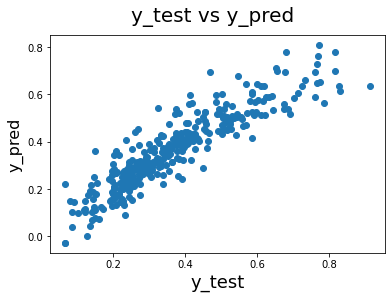

In [132]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [133]:
#calculate the R2 score for our test model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8180684011393603

Observation:
   - approximately `82%` of r2_score is achieved on test data. where as we obtained 87% on our train data 

Text(0.5, 0.98, 'Residual Distribution on test Data')

Text(0.5, 0, 'Errors')

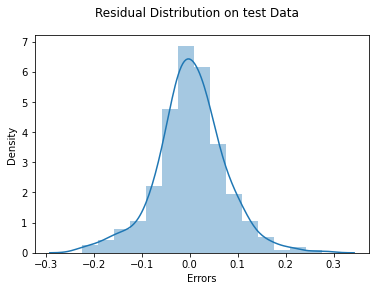

In [134]:
#let's see the residual distribution for our test data as well
residuals = y_test - y_pred
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Residual Distribution on test Data') # Plot heading 
plt.xlabel('Errors')  

Observation:
    - residuals are normally distributed 

<Figure size 864x360 with 0 Axes>

[Text(0, 0, '1stFlrSF'),
 Text(0, 0, 'SaleType_cwd'),
 Text(0, 0, '2ndFlrSF'),
 Text(0, 0, 'house_Age'),
 Text(0, 0, 'Neighborhood_stonebr'),
 Text(0, 0, 'BsmtFinSF1'),
 Text(0, 0, 'KitchenQual'),
 Text(0, 0, 'Condition1_rrnn'),
 Text(0, 0, 'OverallCond'),
 Text(0, 0, 'Neighborhood_nridght'),
 Text(0, 0, 'GarageCars'),
 Text(0, 0, 'LotArea'),
 Text(0, 0, 'BsmtUnfSF'),
 Text(0, 0, 'Condition1_posa'),
 Text(0, 0, 'BldgType_duplex'),
 Text(0, 0, 'RoofStyle_hip')]

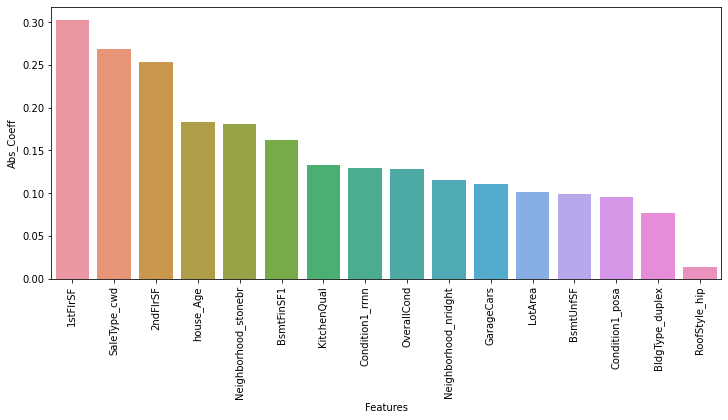

In [135]:
#Let's display the importance of each feature
importance = pd.DataFrame(columns=['Features','Actual_Coeff','Abs_Coeff']) 
importance['Actual_Coeff'] = pd.Series(lm_15.params.values[1:])
importance['Abs_Coeff'] = pd.Series(np.abs(lm_15.params.values[1:])) #lm_15.params.values[1:] gives the coefficients
importance['Features']= X_train_lm_15.columns
importance.set_index('Features',inplace=True)
importance.sort_values(by=['Abs_Coeff'],inplace=True,ascending=False)
plt.figure(figsize = (12, 5))
chart = sns.barplot(x=importance.index,y=importance.Abs_Coeff)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

Observation:
    
    - top5 features according to our model : 1stFlrSF,SaleType_cwd,2ndFlrSF,house_Age,Neighborhood_stonebr

### Ridge Regularisation

For Ridge, we are going to pass the features selected by the lm_15 model as input features

In [136]:
#Ridge() 
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50, 100, 500, 1000]}

#Perfrm Ridge regression using GirdSearrchCV
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5,
                              return_train_score=True,verbose = 1)

ridge_regressor.fit(X_train_lm_15, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [137]:
#Best Alpha value
ridge_regressor.best_params_

{'alpha': 1}

In [138]:
#BestScore
ridge_regressor.best_score_

-0.004090325472418836

In [139]:
#Calculate the MSE,R2_score for train and test
rr1 = Ridge(alpha=1)

#fit the ridge model 
rr1.fit(X_train_lm_15, y_train) 

#prediction on train set
pred_train_rr= rr1.predict(X_train_lm_15)

print("Train MSE: ",np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Train R2_Score: ",r2_score(y_train, pred_train_rr))

#predictions on test set
pred_test_rr= rr1.predict(X_test[X_train_lm_15.columns])
print("Test MSE: ",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("Test R2_Score: ",r2_score(y_test, pred_test_rr))

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Train MSE:  0.06081058686580181
Train R2_Score:  0.8745266418461741
Test MSE:  0.07085685464690357
Test R2_Score:  0.8220585682859992


Observation:
    
    - MSE on test is high compared to Train because the test dataset is very small .
    - We have obtained approx. 82% test r2_score where as train has 87%

<Figure size 1440x720 with 0 Axes>

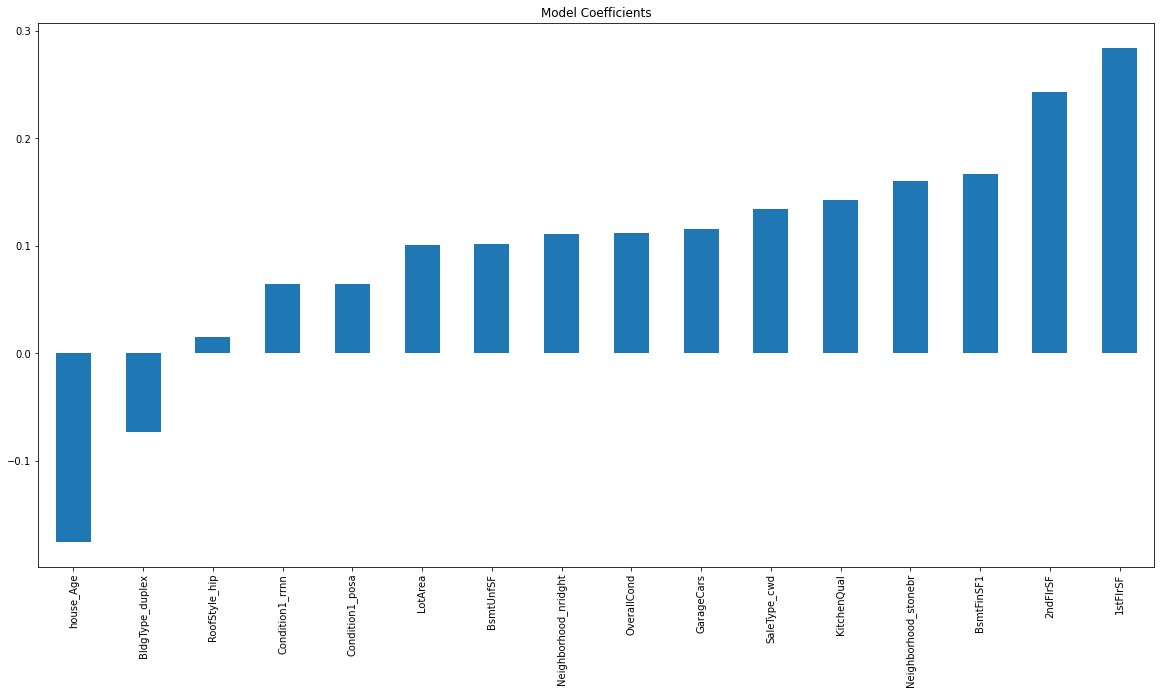

In [140]:
#checking the magnitude of coefficients obtained from ridge with alpha 0.01
plt.figure(figsize=(20,10))
predictors = X_train_lm_15.columns

coef = pd.Series(rr1.coef_,predictors).sort_values()
#plotting barplot for feature coefficients
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

In [141]:
#features and their coefficients
np.abs(coef).sort_values(ascending=False)

1stFlrSF               0.28
2ndFlrSF               0.24
house_Age              0.18
BsmtFinSF1             0.17
Neighborhood_stonebr   0.16
KitchenQual            0.14
SaleType_cwd           0.13
GarageCars             0.12
OverallCond            0.11
Neighborhood_nridght   0.11
BsmtUnfSF              0.10
LotArea                0.10
BldgType_duplex        0.07
Condition1_posa        0.06
Condition1_rrnn        0.06
RoofStyle_hip          0.02
dtype: float64

Observation: Top 5 features Obtained
   - 1stFlrSF                             
   - 2ndFlrSF                          
   - house_Age
   - BsmtFinSF1               
   - Neighborhood_stonebr       

#### Doubling the alpha value for the Ridge

In [142]:
#Train and Test MSE,R2_score after doubling the alpha 
rr2 = Ridge(alpha=2)
#fitting the model
rr2.fit(X_train_lm_15, y_train) 
#predictions of train data
pred_train_rr_2= rr2.predict(X_train_lm_15)
print("\nTrain MSE :",np.sqrt(mean_squared_error(y_train,pred_train_rr_2)))
print("Train r2_Score :",r2_score(y_train, pred_train_rr_2))
#predictions of test data
pred_test_rr_2= rr2.predict(X_test[X_train_lm_15.columns])
print("Test MSE :",np.sqrt(mean_squared_error(y_test,pred_test_rr_2))) 
print("Test r2_score :",r2_score(y_test, pred_test_rr_2))

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Train MSE : 0.06131940879089764
Train r2_Score : 0.872418104533988
Test MSE : 0.07089766608657007
Test r2_score : 0.8218535313166909


Observation:
 - we obtained 87% on train and 82% r2_score on test 

<Figure size 1440x720 with 0 Axes>

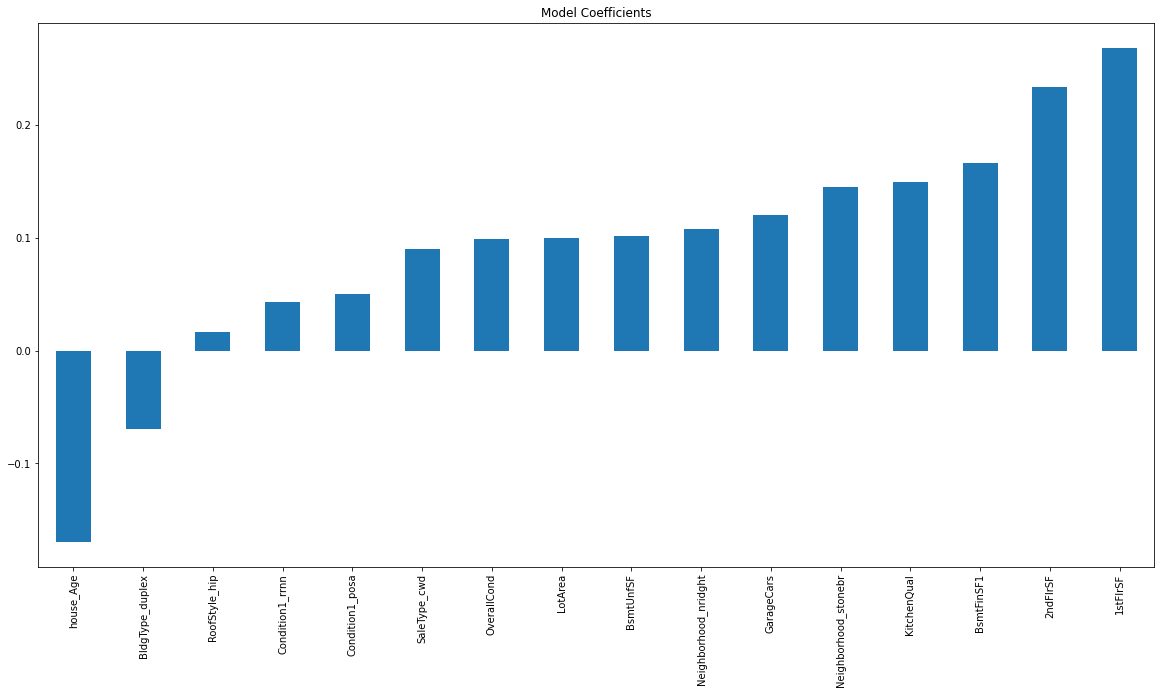

In [143]:
#checking the magnitude of coefficients
plt.figure(figsize=(20,10))
predictors = X_train_lm_15.columns
#dataframe to hold the coefficient values of the features
coef_rr_2 = pd.Series(rr2.coef_,predictors).sort_values()

coef_rr_2.plot(kind='bar', title='Model Coefficients')
plt.show()

In [144]:
#features and their coefficients
np.abs(coef_rr_2).sort_values(ascending=False)

1stFlrSF               0.27
2ndFlrSF               0.23
house_Age              0.17
BsmtFinSF1             0.17
KitchenQual            0.15
Neighborhood_stonebr   0.15
GarageCars             0.12
Neighborhood_nridght   0.11
BsmtUnfSF              0.10
LotArea                0.10
OverallCond            0.10
SaleType_cwd           0.09
BldgType_duplex        0.07
Condition1_posa        0.05
Condition1_rrnn        0.04
RoofStyle_hip          0.02
dtype: float64

Observation: Top 5 features Obtained
   - 1stFlrSF               
   - 2ndFlrSF  
   - house_Age            
   - BsmtFinSF1                           
   - Neighborhood_stonebr | KitchenQual           

### Lasso Regularisation

We are passing same set of features we obtained from lm_15  

In [145]:
#Lasso() 
lasso = Lasso()

#Perform Lasso along with GridSearchCV
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5,
                              return_train_score=True,verbose = 1)
#Fit the model
lasso_regressor.fit(X_train_lm_15, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [146]:
#Best alpha value
lasso_regressor.best_params_

{'alpha': 0.0001}

In [147]:
#BestScore , generally it should be close to 0
lasso_regressor.best_score_

-0.004101833683274281

In [148]:
#MSE , R2_score for train and test
lr = Lasso(alpha=0.0001)

#fitting the model
lr.fit(X_train_lm_15, y_train) 

#predictions on train data
pred_train_lr= lr.predict(X_train_lm_15)
print("\nTrain MSE:",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("Train r2_score:",r2_score(y_train, pred_train_lr))
#predictions on testt data
pred_test_lr= lr.predict(X_test[X_train_lm_15.columns])
print("Test MSE :",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test r2_score :",r2_score(y_test, pred_test_lr))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


Train MSE: 0.0606291296404214
Train r2_score: 0.8752743431583253
Test MSE : 0.07080024947229308
Test r2_score : 0.8223427576593065


Observation:
  - Train r2_score : 87%
  - Test r2_score  : 82%

<Figure size 1440x720 with 0 Axes>

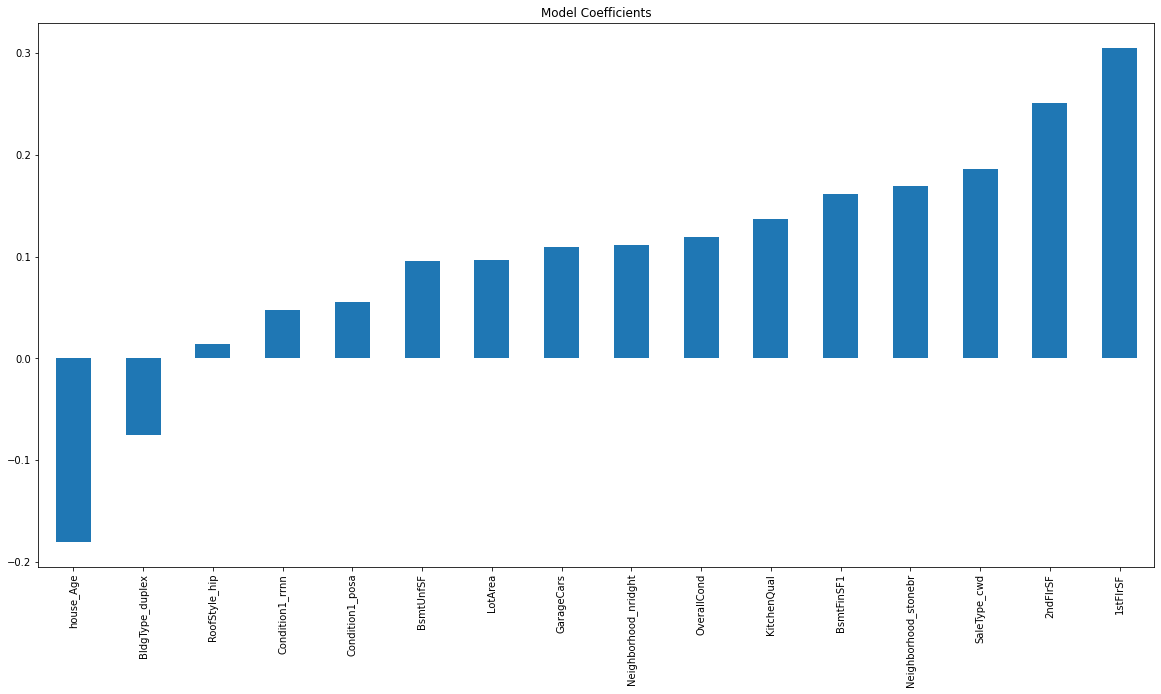

In [149]:
#checking the magnitude of coefficients

predictors = X_train_lm_15.columns

#storing the predictor and their coefficient values in coef_lasso
coef_lasso = pd.Series(lr.coef_,predictors).sort_values()
plt.figure(figsize=(20,10))

#bar plot to show coefficients
coef_lasso .plot(kind='bar', title='Model Coefficients')
plt.show()

In [150]:
#features and their coefficients
np.abs(coef_lasso).sort_values(ascending=False)

1stFlrSF               0.31
2ndFlrSF               0.25
SaleType_cwd           0.19
house_Age              0.18
Neighborhood_stonebr   0.17
BsmtFinSF1             0.16
KitchenQual            0.14
OverallCond            0.12
Neighborhood_nridght   0.11
GarageCars             0.11
LotArea                0.10
BsmtUnfSF              0.10
BldgType_duplex        0.08
Condition1_posa        0.06
Condition1_rrnn        0.05
RoofStyle_hip          0.01
dtype: float64

Observation: Top 5 features Obtained
   - 1stFlrSF               
   - 2ndFlrSF               
   - SaleType_cwd           
   - house_Age              
   - Neighborhood_stonebr             

#### Doubling the alpha value 

In [151]:
#doubling the alpha value and running the model again
lr_2 = Lasso(alpha=0.0002)
#fitting the model
lr_2.fit(X_train_lm_15, y_train) 
#train predictions
pred_train_lr= lr_2.predict(X_train_lm_15)
print("\nTrain MSE :",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("Train r2_score :",r2_score(y_train, pred_train_lr))
#Test predictions
pred_test_lr= lr_2.predict(X_test[X_train_lm_15.columns])
print("Test MSE :",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test r2_score :",r2_score(y_test, pred_test_lr))

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


Train MSE : 0.06111024526079118
Train r2_score : 0.8732869963714835
Test MSE : 0.07055919768815591
Test r2_score : 0.8235504283568559


Observation:
  - Train r2_score : 0.87
  - test r2_score  : 0.82

<Figure size 1440x720 with 0 Axes>

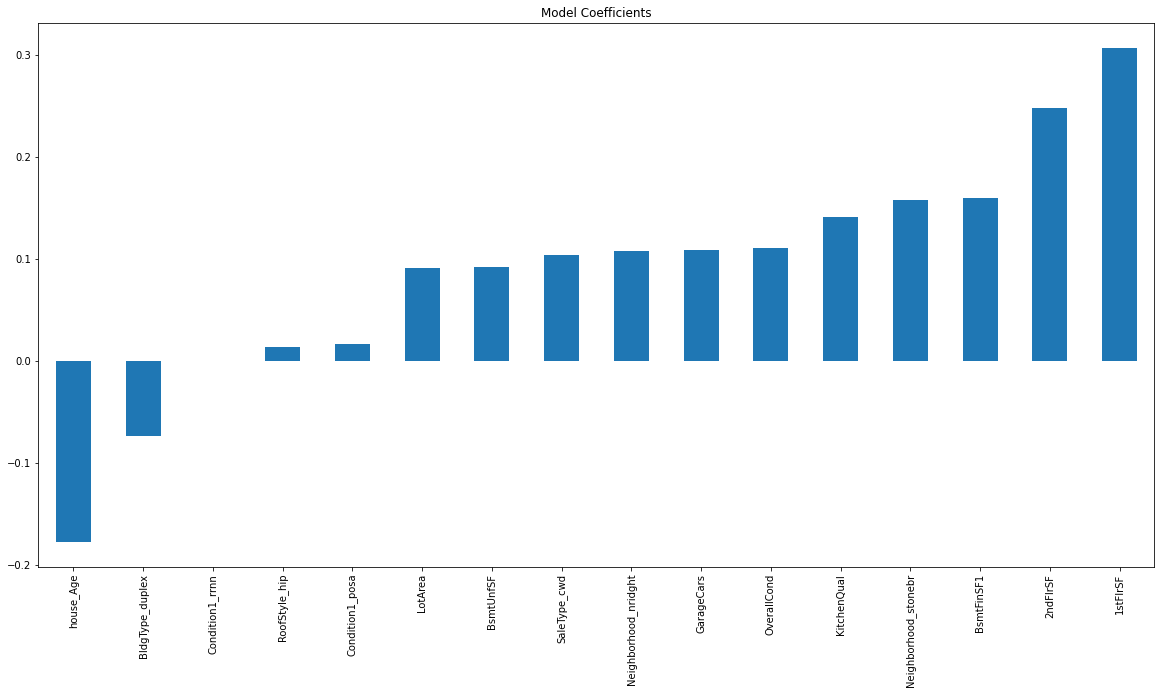

In [152]:
#checking the magnitude of coefficients

predictors = X_train_lm_15.columns

coef_lasso_2 = pd.Series(lr_2.coef_,predictors).sort_values()

plt.figure(figsize=(20,10))
coef_lasso_2.plot(kind='bar', title='Model Coefficients')
plt.show()

Observation:
  - observe, in above plot the lasso shrinked the coefficient of condition1_rmn to 0

In [153]:
np.abs(coef_lasso_2).sort_values(ascending=False)

1stFlrSF               0.31
2ndFlrSF               0.25
house_Age              0.18
BsmtFinSF1             0.16
Neighborhood_stonebr   0.16
KitchenQual            0.14
OverallCond            0.11
GarageCars             0.11
Neighborhood_nridght   0.11
SaleType_cwd           0.10
BsmtUnfSF              0.09
LotArea                0.09
BldgType_duplex        0.07
Condition1_posa        0.02
RoofStyle_hip          0.01
Condition1_rrnn        0.00
dtype: float64

Observation: Top 5 features Obtained
   - 1stFlrSF               
   - 2ndFlrSF               
   - house_Age              
   - BsmtFinSF1             
   - Neighborhood_stonebr   

Subjective Question:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [154]:
#Top5 models from lasso
Top5_lasso_Features = ['1stFlrSF','house_Age','BsmtFinSF1','2ndFlrSF','Neighborhood_stonebr']

Assumption:
    
    I am passing entire X_train dataset except the above 5 features, As lasso can perform the feature selection by shrinking the coefficients of least important variables to 0

In [155]:
#X_train excluding the top5 features
X_train_excludetop5 = X_train.drop(columns=Top5_lasso_Features)

In [156]:
lasso = Lasso()

#building the model using cross validation

lasso_regressor_exc = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5,
                              return_train_score=True,verbose = 1)
#fitting the model
lasso_regressor_exc.fit(X_train_excludetop5, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [157]:
#best alpha value 
lasso_regressor_exc.best_params_

{'alpha': 0.0001}

In [158]:
#best score of the model 
lasso_regressor_exc.best_score_

-0.003153007041759034

In [159]:
#Build model using best alpha obtained
lr_exc = Lasso(alpha=0.0001)
#fitting the model
lr_exc.fit(X_train_excludetop5, y_train) 
#train predictions
pred_train_lr_exc= lr_exc.predict(X_train_excludetop5)
#MSE , R2 score for test and train
print("Train MSE:",np.sqrt(mean_squared_error(y_train,pred_train_lr_exc)))
print("Train r2_score:",r2_score(y_train, pred_train_lr_exc))
#test predictions
pred_test_lr_exc = lr_exc.predict(X_test[X_train_excludetop5.columns])
print("Test MSE:",np.sqrt(mean_squared_error(y_test,pred_test_lr_exc))) 
print("Test r2_score:",r2_score(y_test, pred_test_lr_exc))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Train MSE: 0.045501134846049514
Train r2_score: 0.9297514136238938
Test MSE: 0.055741689626945326
Test r2_score: 0.8898781247851701


Observation:
  - Train R2_Score : 93%
  - Test r2_score : 89%

<Figure size 2880x720 with 0 Axes>

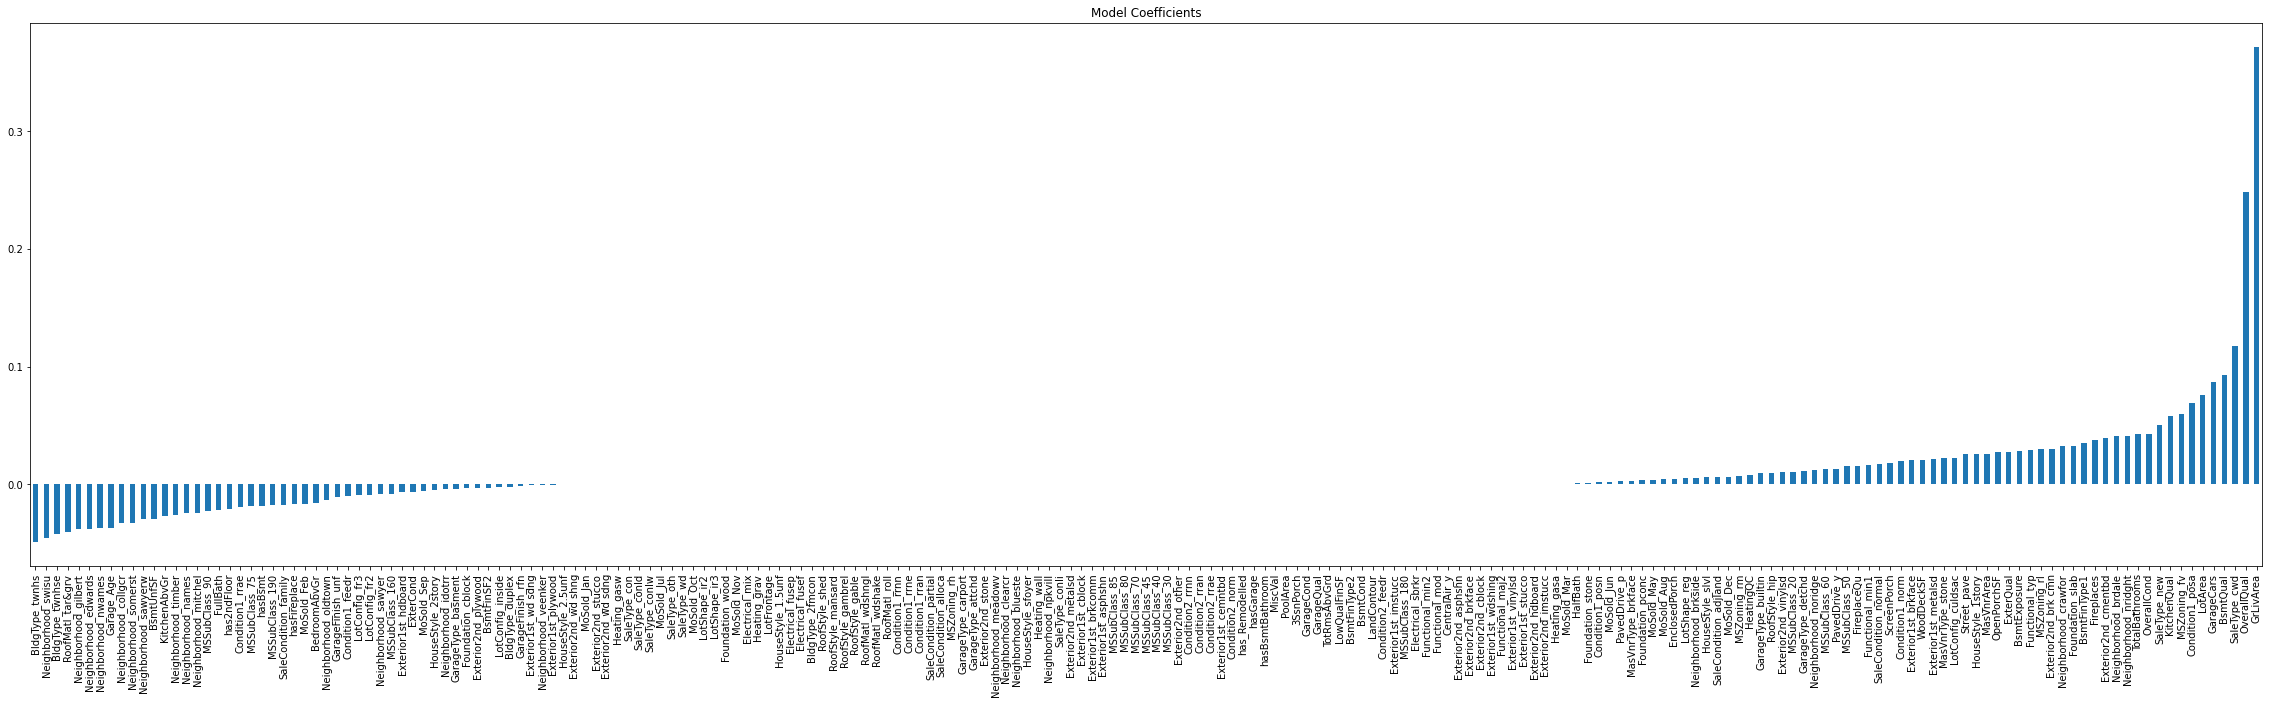

In [160]:
#checking the magnitude of coefficients obtained

predictors = X_train_excludetop5.columns

coef_lasso_exc = pd.Series(lr_exc.coef_,predictors).sort_values()
plt.figure(figsize=(40,10))
coef_lasso_exc.plot(kind='bar', title='Model Coefficients')
plt.show()

In [161]:
#features and their coefficients
np.abs(coef_lasso_exc).sort_values(ascending=False)

GrLivArea               0.37
OverallQual             0.25
SaleType_cwd            0.12
BsmtQual                0.09
GarageCars              0.09
LotArea                 0.08
Condition1_posa         0.07
MSZoning_fv             0.06
KitchenQual             0.06
SaleType_new            0.05
BldgType_twnhs          0.05
Neighborhood_swisu      0.05
OverallCond             0.04
TotalBathrooms          0.04
BldgType_twnhse         0.04
Neighborhood_nridght    0.04
Neighborhood_brdale     0.04
RoofMatl_tar&grv        0.04
Exterior2nd_cmentbd     0.04
Fireplaces              0.04
Neighborhood_gilbert    0.04
Neighborhood_edwards    0.04
Neighborhood_nwames     0.04
Garage_Age              0.04
BsmtFinType1            0.03
Neighborhood_collgcr    0.03
Foundation_slab         0.03
Neighborhood_crawfor    0.03
Neighborhood_somerst    0.03
Exterior2nd_brk cmn     0.03
MSZoning_rl             0.03
Neighborhood_sawyerw    0.03
BsmtUnfSF               0.03
Functional_typ          0.03
BsmtExposure  

If we exclude the top 5 features from first lasso model,and rebuild it with the rest of the features in the dataset- we obtain below as the top 5 features:
    
  - GrLivArea               
  - OverallQual             
  - SaleType_cwd 
  - BsmtQual 
  - GarageCars       


  Also observe  that the lasso model has shrinked many featyre coefficients to 0 and made the feature selection easy. and the resultant model is robust      
                 